C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\3378284143.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dat['ShedderStatus'] = dat.groupby('VOLUNTEER')['V'].transform(lambda x: any(x > 0)) # Shedder based on 'V'
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\3378284143.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dat['HA Full-length Titer Log2'] = np.log2(dat['HA Full-length Titer'])
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\3378284143.py:25: PerformanceWarning: DataFrame is highly fragmented.  This 

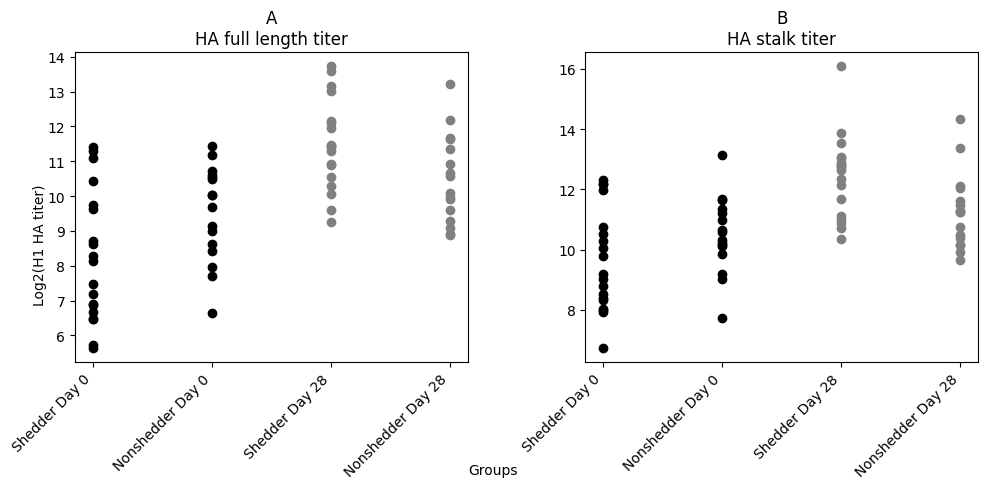

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'Table8.xlsx'
cols = list(range(0, 143))  # drop the last 72 columns (cell medians)
dat = pd.read_excel(file_path, usecols=cols)
baseline_days = [0]
measurement_columns = dat.columns[15:]
numeric_columns = dat.columns[3:]
dat[numeric_columns] = dat[numeric_columns].apply(pd.to_numeric, errors='coerce')
dat['ShedderStatus'] = dat.groupby('VOLUNTEER')['V'].transform(lambda x: any(x > 0)) # Shedder based on 'V' 
baseline_data = dat[dat['DAY'].isin(baseline_days)]
baseline_means = baseline_data.groupby('ShedderStatus')[measurement_columns].mean() + 1e-8
for col in measurement_columns:
    shedder_baseline = baseline_means[col].loc[True]
    nonshedder_baseline = baseline_means[col].loc[False]
    #dat[col] = np.where(dat['ShedderStatus'], dat[col] / shedder_baseline, dat[col] / nonshedder_baseline)

selected_days = [0, 28]
dat = dat[dat['DAY'].isin(selected_days)]

# Log transform the titer data
dat['HA Full-length Titer Log2'] = np.log2(dat['HA Full-length Titer'])
dat['HA Stalk Titer Log2'] = np.log2(dat['HA Stalk Titer'])

# We need to plot each volunteer as a point, and each shedder status as a different group on the x-axis
# We'll use numerical x-axis values to achieve the 4 distinct groups:
# 1 - Shedder Day 0, 2 - Nonshedder Day 0, 3 - Shedder Day 28, 4 - Nonshedder Day 28

# Assign a group number based on ShedderStatus and DAY
dat['Group'] = dat.apply(lambda row: 1 if row['ShedderStatus'] and row['DAY'] == 0 else
                                      2 if not row['ShedderStatus'] and row['DAY'] == 0 else
                                      3 if row['ShedderStatus'] and row['DAY'] == 28 else
                                      4, axis=1)

# Prepare the plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

# Scatter plot for HA full length titer
ax[0].scatter(dat.loc[dat['DAY'] == 0, 'Group'], dat.loc[dat['DAY'] == 0, 'HA Full-length Titer Log2'],
              c='black', label='Day 0')
ax[0].scatter(dat.loc[dat['DAY'] == 28, 'Group'], dat.loc[dat['DAY'] == 28, 'HA Full-length Titer Log2'],
              c='grey', label='Day 28')

# Scatter plot for HA stalk titer
ax[1].scatter(dat.loc[dat['DAY'] == 0, 'Group'], dat.loc[dat['DAY'] == 0, 'HA Stalk Titer Log2'],
              c='black', label='Day 0')
ax[1].scatter(dat.loc[dat['DAY'] == 28, 'Group'], dat.loc[dat['DAY'] == 28, 'HA Stalk Titer Log2'],
              c='grey', label='Day 28')

# Set the x-axis ticks and labels
group_labels = ['Shedder Day 0', 'Nonshedder Day 0', 'Shedder Day 28', 'Nonshedder Day 28']
ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_xticklabels(group_labels, rotation=45, ha='right')

ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xticklabels(group_labels, rotation=45, ha='right')

# Set titles
ax[0].set_title('A\nHA full length titer')
ax[1].set_title('B\nHA stalk titer')

# Set common y-axis label
fig.text(0.5, 0.04, 'Groups', ha='center')
fig.text(0.04, 0.5, 'Log2(H1 HA titer)', va='center', rotation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\2538028608.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dat['Fold Change Full'] = dat['VOLUNTEER'].map(fold_changes_full)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\2538028608.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dat['Fold Change Stalk'] = dat['VOLUNTEER'].map(fold_changes_stalk)


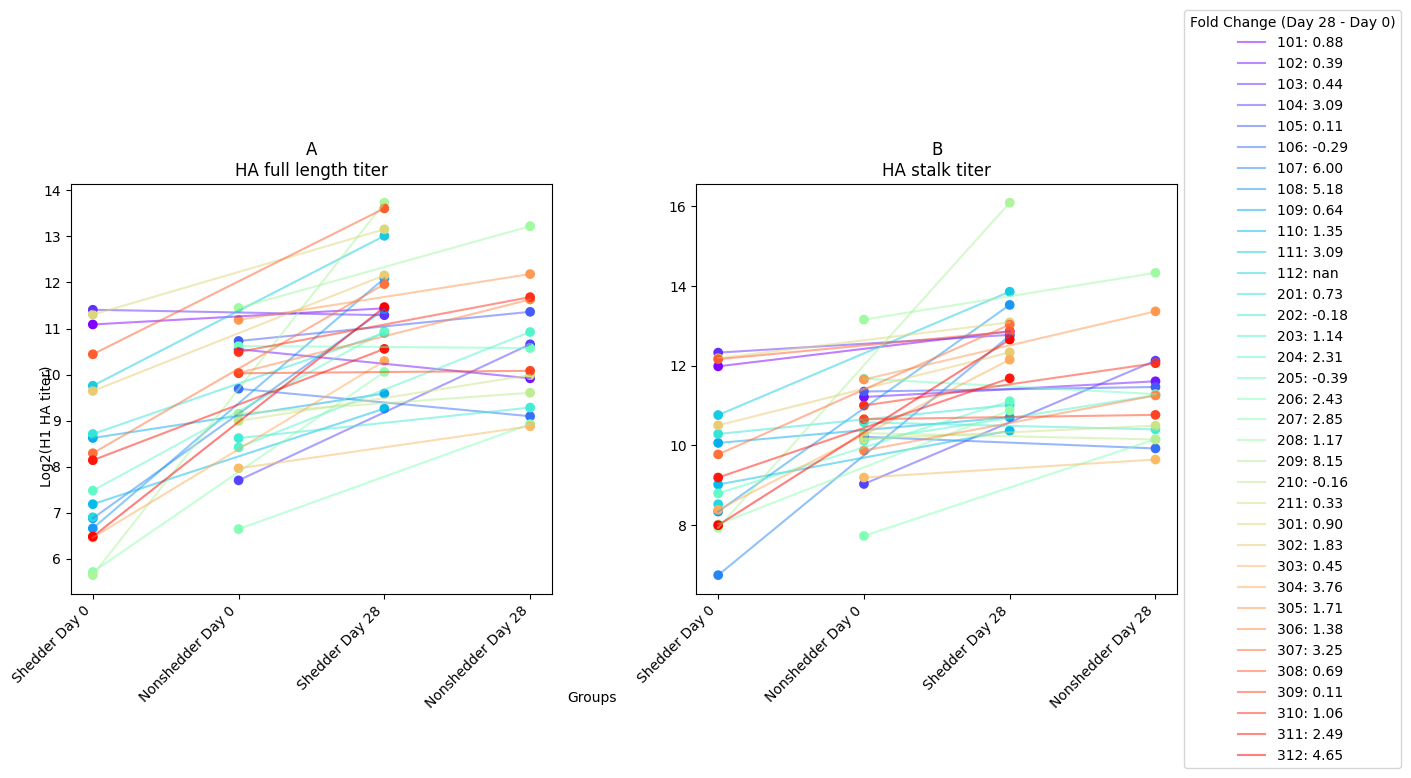

In [2]:
volunteer_grouped = dat.groupby(['VOLUNTEER', 'DAY'])

# Calculate the log2 fold change for each volunteer from Day 0 to Day 28
fold_changes_full = volunteer_grouped['HA Full-length Titer Log2'].mean().unstack().diff(axis=1)[28]
fold_changes_stalk = volunteer_grouped['HA Stalk Titer Log2'].mean().unstack().diff(axis=1)[28]

# Add the fold change as a new column in the dataframe for each titer type
dat['Fold Change Full'] = dat['VOLUNTEER'].map(fold_changes_full)
dat['Fold Change Stalk'] = dat['VOLUNTEER'].map(fold_changes_stalk)

# Create a color mapping for each VOLUNTEER
volunteers = dat['VOLUNTEER'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(volunteers)))
color_dict = dict(zip(volunteers, colors))

# Prepare the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Loop through each VOLUNTEER to plot the traces
for volunteer in volunteers:
    volunteer_data = dat[dat['VOLUNTEER'] == volunteer]
    # For HA full length titer
    ax[0].plot(volunteer_data['Group'], volunteer_data['HA Full-length Titer Log2'],
                label=f"{volunteer}: {fold_changes_full[volunteer]:.2f}", alpha=0.5, color=color_dict[volunteer])
    # For HA stalk titer
    ax[1].plot(volunteer_data['Group'], volunteer_data['HA Stalk Titer Log2'],
                label=f"{volunteer}: {fold_changes_stalk[volunteer]:.2f}", alpha=0.5, color=color_dict[volunteer])

# Add scatter plots for individual points
# For HA full length titer
ax[0].scatter(dat['Group'], dat['HA Full-length Titer Log2'], c=[color_dict[v] for v in dat['VOLUNTEER']])
# For HA stalk titer
ax[1].scatter(dat['Group'], dat['HA Stalk Titer Log2'], c=[color_dict[v] for v in dat['VOLUNTEER']])

# Set the x-axis ticks and labels
ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_xticklabels(group_labels, rotation=45, ha='right')
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xticklabels(group_labels, rotation=45, ha='right')

# Set titles and common y-axis label
ax[0].set_title('A\nHA full length titer')
ax[1].set_title('B\nHA stalk titer')
fig.text(0.5, 0.04, 'Groups', ha='center')
fig.text(0.04, 0.5, 'Log2(H1 HA titer)', va='center', rotation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Add a legend outside the plot, to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Fold Change (Day 28 - Day 0)')

# Show the plot
plt.show()


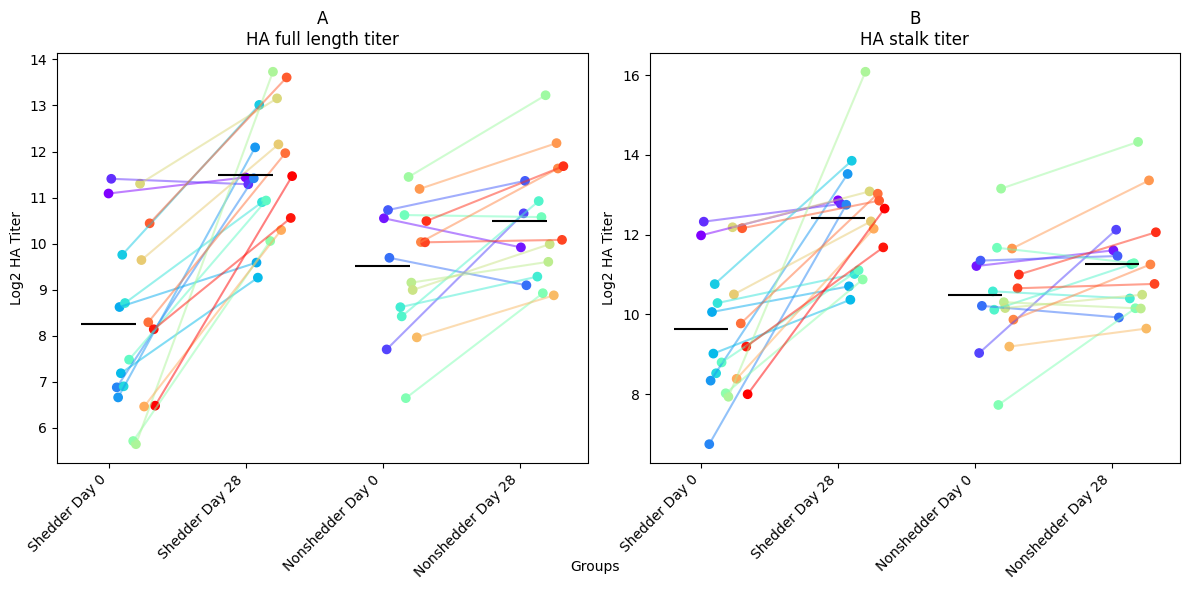

In [3]:
# Redefine the 'Group' based on the new x-axis order
dat['Group'] = dat.apply(lambda row: 1 if row['ShedderStatus'] and row['DAY'] == 0 else
                                      2 if row['ShedderStatus'] and row['DAY'] == 28 else
                                      3 if not row['ShedderStatus'] and row['DAY'] == 0 else
                                      4, axis=1)

# New group labels based on the reordered x-axis
new_group_labels = ['Shedder Day 0', 'Shedder Day 28', 'Nonshedder Day 0', 'Nonshedder Day 28']

def add_mean_bars(ax, data, titer_type, group_numbers):
    means = data.groupby(['Group'])[titer_type].mean()
    for group in group_numbers:
        # Draw a horizontal line for the mean of the group
        ax.hlines(means[group], group - 0.2, group + 0.2, colors='black')

volunteer_offsets = {vol: idx * 0.01 for idx, vol in enumerate(sorted(dat['VOLUNTEER'].unique()))}

def add_jittered_scatter(ax, data, titer_type, color_dict):
    # Apply the jitter to the x-position by modifying the 'Group' value slightly
    jittered_x = data.apply(lambda row: row['Group'] + volunteer_offsets[row['VOLUNTEER']], axis=1)
    ax.scatter(jittered_x, data[titer_type], c=[color_dict[v] for v in data['VOLUNTEER']])

def add_jittered_lines(ax, data, titer_type, color_dict):
    for volunteer in volunteers:
        volunteer_data = data[data['VOLUNTEER'] == volunteer]
        # Apply the jitter to the x-position for lines
        jittered_x = [group + volunteer_offsets[volunteer] for group in volunteer_data['Group']]
        ax.plot(jittered_x, volunteer_data[titer_type], alpha=0.5, color=color_dict[volunteer])

fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Add jittered lines and scatter plots for each plot
add_jittered_lines(ax[0], dat, 'HA Full-length Titer Log2', color_dict)
add_jittered_scatter(ax[0], dat, 'HA Full-length Titer Log2', color_dict)
add_jittered_lines(ax[1], dat, 'HA Stalk Titer Log2', color_dict)
add_jittered_scatter(ax[1], dat, 'HA Stalk Titer Log2', color_dict)

# Add mean bars to both plots
add_mean_bars(ax[0], dat, 'HA Full-length Titer Log2', [1, 2, 3, 4])
add_mean_bars(ax[1], dat, 'HA Stalk Titer Log2', [1, 2, 3, 4])

# Adjust x-axis labels
ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_xticklabels(new_group_labels, rotation=45, ha='right')
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xticklabels(new_group_labels, rotation=45, ha='right')

ax[0].set_ylabel('Log2 HA Titer')
ax[1].set_ylabel('Log2 HA Titer')  

# Set titles and labels
ax[0].set_title('A\nHA full length titer')
ax[1].set_title('B\nHA stalk titer')
fig.text(0.5, 0.04, 'Groups', ha='center')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

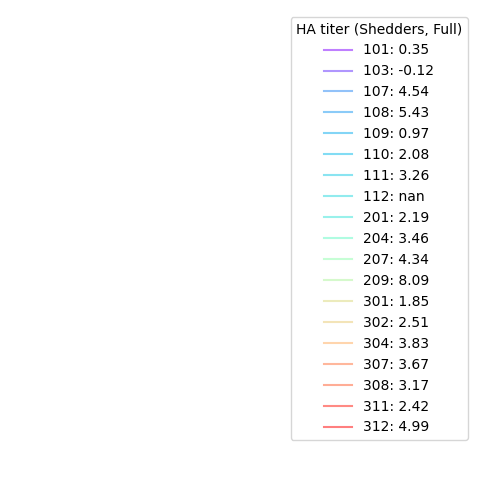

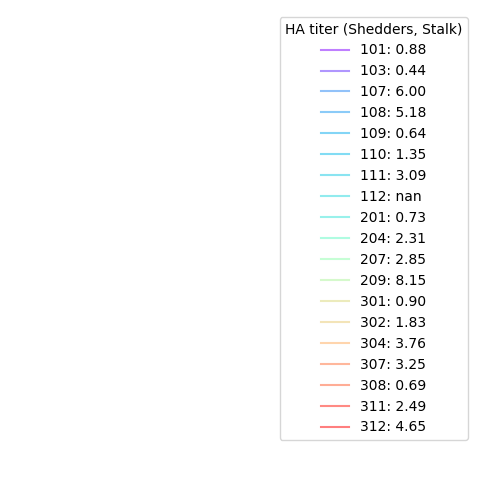

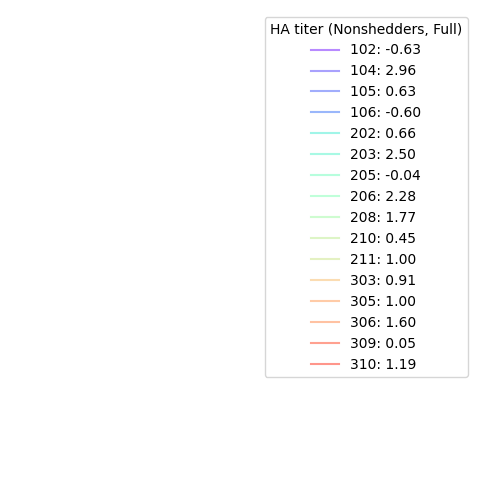

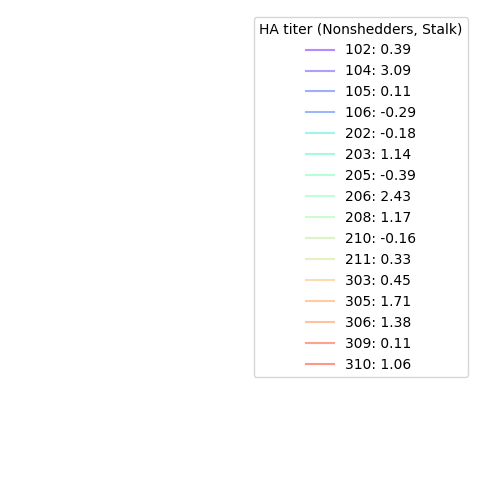

In [4]:
shedder_data = dat[dat['ShedderStatus']]
nonshedder_data = dat[~dat['ShedderStatus']]

def generate_subplot_legend(subplot_data, titer_type, status):
    # Create a new figure for the legend
    fig, ax = plt.subplots(figsize=(6, 6))
    # Add a line to the legend for each VOLUNTEER in the subplot's data
    for volunteer in subplot_data['VOLUNTEER'].unique():
        fold_change = subplot_data[subplot_data['VOLUNTEER'] == volunteer][titer_type].iloc[-1] - \
                      subplot_data[subplot_data['VOLUNTEER'] == volunteer][titer_type].iloc[0]
        label = f"{volunteer}: {fold_change:.2f}"
        ax.plot([], [], alpha=0.5, color=color_dict[volunteer], label=label)
    # Remove plot elements, as we only want the legend
    ax.set_axis_off()
    # Set legend title based on the titer type and shedder status
    legend_title = f'{titer_type.split()[0]} titer ({status})'
    ax.legend(title=legend_title)
    plt.show()

# Generate legends for each subplot
generate_subplot_legend(shedder_data, 'HA Full-length Titer Log2', 'Shedders, Full')
generate_subplot_legend(shedder_data, 'HA Stalk Titer Log2', 'Shedders, Stalk')
generate_subplot_legend(nonshedder_data, 'HA Full-length Titer Log2', 'Nonshedders, Full')
generate_subplot_legend(nonshedder_data, 'HA Stalk Titer Log2', 'Nonshedders, Stalk')


In [7]:
from scipy.stats import ttest_ind

def calculate_log_fold_changes(data, titer_type):
    # Calculate the log-fold change
    fold_changes = {}
    volunteers = data['VOLUNTEER'].unique()
    for volunteer in volunteers:
        volunteer_data = data[data['VOLUNTEER'] == volunteer]
        if len(volunteer_data) == 2:  # Ensure data for both days
            day0_data = volunteer_data[volunteer_data['DAY'] == 0][titer_type].values[0]
            day28_data = volunteer_data[volunteer_data['DAY'] == 28][titer_type].values[0]
            if day0_data > 0 and day28_data > 0:  # Ensure no zero values
                log_fold_change = np.log2(day28_data) - np.log2(day0_data)
                fold_changes[volunteer] = log_fold_change
    return fold_changes

def perform_t_tests(shedder_data, nonshedder_data, titer_type):
    # Calculate log-fold changes for each group
    shedder_changes = calculate_log_fold_changes(shedder_data, titer_type)
    nonshedder_changes = calculate_log_fold_changes(nonshedder_data, titer_type)

    # Convert to arrays
    shedder_values = np.array(list(shedder_changes.values()))
    nonshedder_values = np.array(list(nonshedder_changes.values()))

    # Perform the t-test
    t_stat, p_val = ttest_ind(shedder_values, nonshedder_values, equal_var=False)  # Welch's t-test
    return t_stat, p_val

# Running t-tests for each titer type
titer_types = ['HA Full-length Titer Log2', 'HA Stalk Titer Log2']
t_test_results = {}
for titer_type in titer_types:
    t_stat, p_val = perform_t_tests(shedder_data, nonshedder_data, titer_type)
    t_test_results[titer_type] = {'t_stat': t_stat, 'p_value': p_val}

# Output the t-test results
t_test_results

{'HA Full-length Titer Log2': {'t_stat': 3.9461386663124394,
  'p_value': 0.0005450000293817648},
 'HA Stalk Titer Log2': {'t_stat': 3.4155336954618187,
  'p_value': 0.0021650582081489157}}

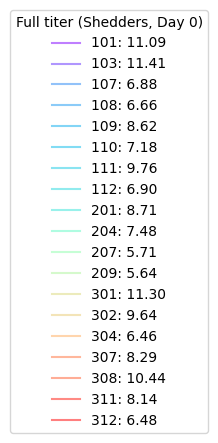

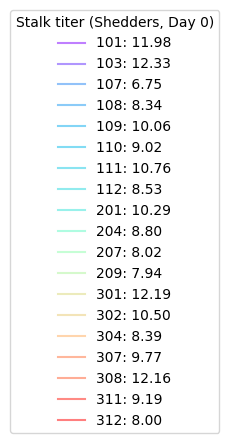

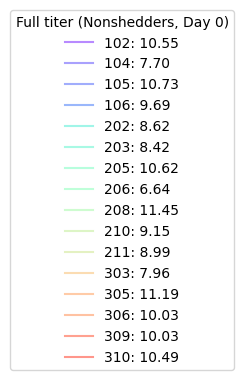

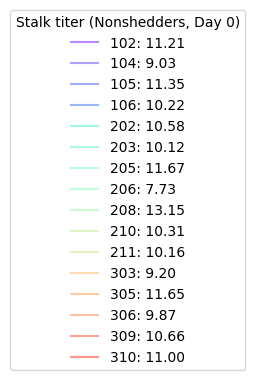

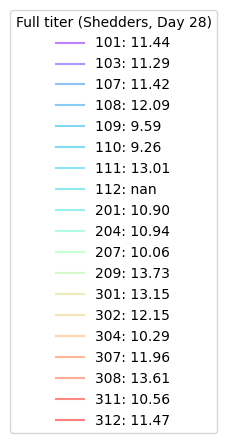

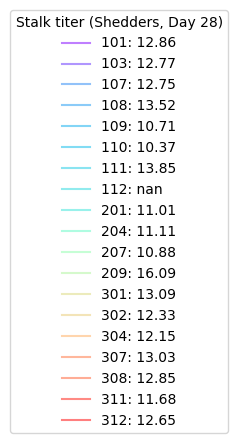

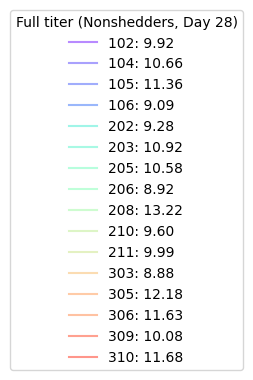

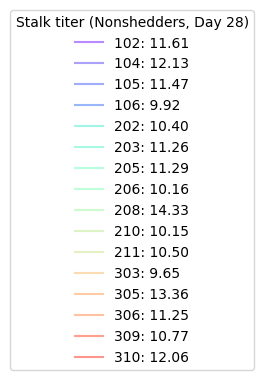

In [8]:
def generate_subplot_legend_for_day(subplot_data, titer_type, status, day):
    # Filter data for the specific day
    day_data = subplot_data[subplot_data['DAY'] == day]
    
    # Create a new figure for the legend
    fig, ax = plt.subplots()
    
    # Add a line to the legend for each VOLUNTEER in the day's data
    for volunteer in day_data['VOLUNTEER'].unique():
        titer_value = day_data[day_data['VOLUNTEER'] == volunteer][titer_type].iloc[0]
        label = f"{volunteer}: {titer_value:.2f}"
        ax.plot([], [], alpha=0.5, color=color_dict[volunteer], label=label)
    
    # Remove plot elements, as we only want the legend
    ax.set_axis_off()
    
    # Titer type detail (Full or Stalk)
    titer_detail = 'Full' if 'Full-length' in titer_type else 'Stalk'
    
    # Set legend title based on the titer type, shedder status, and day
    day_label = "Day 0" if day == 0 else "Day 28"
    legend_title = f'{titer_detail} titer ({status}, {day_label})'
    legend = ax.legend(title=legend_title, loc='center')

    # Get the bounding box of the legend
    fig.canvas.draw()
    bbox = legend.get_frame().get_bbox()
    
    # Set figure size based on legend size
    fig.set_size_inches(bbox.width / fig.dpi, bbox.height / fig.dpi)
    
    # Adjust layout and save or show
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

generate_subplot_legend_for_day(shedder_data, 'HA Full-length Titer Log2', 'Shedders', 0)
generate_subplot_legend_for_day(shedder_data, 'HA Stalk Titer Log2', 'Shedders', 0)
generate_subplot_legend_for_day(nonshedder_data, 'HA Full-length Titer Log2', 'Nonshedders', 0)
generate_subplot_legend_for_day(nonshedder_data, 'HA Stalk Titer Log2', 'Nonshedders', 0)
generate_subplot_legend_for_day(shedder_data, 'HA Full-length Titer Log2', 'Shedders', 28)
generate_subplot_legend_for_day(shedder_data, 'HA Stalk Titer Log2', 'Shedders', 28)
generate_subplot_legend_for_day(nonshedder_data, 'HA Full-length Titer Log2', 'Nonshedders', 28)
generate_subplot_legend_for_day(nonshedder_data, 'HA Stalk Titer Log2', 'Nonshedders', 28)

In [9]:
def compute_statistics(data, group_conditions):
    results = {}
    for status, day, titer_type in group_conditions:
        # Filter data based on the conditions
        group_data = data[(data['ShedderStatus'] == status) & (data['DAY'] == day)]
        
        # Calculate mean, std, and count of valid data points for the titer type
        valid_data = group_data[titer_type].dropna()
        mean_val = valid_data.mean()
        std_val = valid_data.std()
        count_val = valid_data.count()
        
        # Create a unique key for each group condition
        key = f"{('Shedder' if status else 'Nonshedder')} Day {day} {titer_type.split()[1]}"
        results[key] = {'mean': mean_val, 'std': std_val, 'n': count_val}
    
    return results

# Define the group conditions
group_conditions = [
    (True, 0, 'HA Full-length Titer Log2'), (True, 28, 'HA Full-length Titer Log2'),
    (True, 0, 'HA Stalk Titer Log2'), (True, 28, 'HA Stalk Titer Log2'),
    (False, 0, 'HA Full-length Titer Log2'), (False, 28, 'HA Full-length Titer Log2'),
    (False, 0, 'HA Stalk Titer Log2'), (False, 28, 'HA Stalk Titer Log2')
]

# Compute statistics for each group
group_statistics = compute_statistics(dat, group_conditions)

# Output the dictionary with the results
group_statistics

{'Shedder Day 0 Full-length': {'mean': 8.25243956113951,
  'std': 1.8889796743973037,
  'n': 19},
 'Shedder Day 28 Full-length': {'mean': 11.495440126779355,
  'std': 1.3122768379208851,
  'n': 18},
 'Shedder Day 0 Stalk': {'mean': 9.6327672002658,
  'std': 1.675620373321681,
  'n': 19},
 'Shedder Day 28 Stalk': {'mean': 12.428668791172543,
  'std': 1.372821261714018,
  'n': 18},
 'Nonshedder Day 0 Full-length': {'mean': 9.51685750105621,
  'std': 1.3700321563292142,
  'n': 16},
 'Nonshedder Day 28 Full-length': {'mean': 10.500228367506816,
  'std': 1.2656138499023435,
  'n': 16},
 'Nonshedder Day 0 Stalk': {'mean': 10.494802332551949,
  'std': 1.2534095523369508,
  'n': 16},
 'Nonshedder Day 28 Stalk': {'mean': 11.268076924289005,
  'std': 1.259250878476353,
  'n': 16}}

In [10]:
def extract_data(data, status, day, titer_type):
    filtered_data = data[(data['ShedderStatus'] == status) & (data['DAY'] == day)][titer_type].dropna()
    return filtered_data

# Function to perform t-tests
def perform_t_test(group1, group2):
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
    return t_stat, p_val

# Define conditions
shedder_status = [True, False]  # True for Shedders, False for Nonshedders
days = [0, 28]
titer_types = ['HA Full-length Titer Log2', 'HA Stalk Titer Log2']

# Dictionary to store results
t_test_results = {}

# 1. Overall difference for Full and Stalk (combined days)
for titer in titer_types:
    shedders_combined = pd.concat([extract_data(dat, True, day, titer) for day in days])
    nonshedders_combined = pd.concat([extract_data(dat, False, day, titer) for day in days])
    t_test_results[f'Overall {titer}'] = perform_t_test(shedders_combined, nonshedders_combined)

# 2. Difference on Day 0 and Day 28 for Full and Stalk
for day in days:
    for titer in titer_types:
        shedders_day = extract_data(dat, True, day, titer)
        nonshedders_day = extract_data(dat, False, day, titer)
        t_test_results[f'{titer} Day {day}'] = perform_t_test(shedders_day, nonshedders_day)

# 3. Differences by Day for each status and titer type
for status in shedder_status:
    for titer in titer_types:
        day0_data = extract_data(dat, status, 0, titer)
        day28_data = extract_data(dat, status, 28, titer)
        key_status = 'Shedders' if status else 'Nonshedders'
        t_test_results[f'{key_status} {titer} Day 0 vs 28'] = perform_t_test(day0_data, day28_data)

# Print or return the test results
t_test_results

{'Overall HA Full-length Titer Log2': (-0.3954517766106176, 0.693904750075127),
 'Overall HA Stalk Titer Log2': (0.27138006098407147, 0.7870098423223492),
 'HA Full-length Titer Log2 Day 0': (-2.2890723621070657,
  0.028742471506640187),
 'HA Stalk Titer Log2 Day 0': (-1.7381591946966826, 0.09162229184448205),
 'HA Full-length Titer Log2 Day 28': (2.2492069313977705, 0.03156484053238058),
 'HA Stalk Titer Log2 Day 28': (2.5707962690887505, 0.015007718116456424),
 'Shedders HA Full-length Titer Log2 Day 0 vs 28': (-6.091037079596943,
  8.167042850961347e-07),
 'Shedders HA Stalk Titer Log2 Day 0 vs 28': (-5.564316589645343,
  3.084963994260854e-06),
 'Nonshedders HA Full-length Titer Log2 Day 0 vs 28': (-2.1089422512776035,
  0.04345920508535246),
 'Nonshedders HA Stalk Titer Log2 Day 0 vs 28': (-1.740899719773677,
  0.09194998068323726)}

In [11]:
def calculate_mean_std(subplot_data, titer_type):
    # Group data by volunteer and filter out those who don't have both day 0 and day 28 data
    valid_groups = subplot_data.groupby('VOLUNTEER').filter(lambda x: x['DAY'].isin([0, 28]).all())
    
    # Calculate fold changes only for groups with both entries
    fold_changes = valid_groups.groupby('VOLUNTEER').apply(lambda x: x[x['DAY'] == 28][titer_type].values[0] - x[x['DAY'] == 0][titer_type].values[0])
    
    # Calculate mean, standard deviation, and count of these changes
    mean_change = fold_changes.mean()
    std_change = fold_changes.std()
    n = fold_changes.count()
    
    return mean_change, std_change, n

# Example usage:
# Assuming 'shedder_data' and 'nonshedder_data' are subsets of 'dat' filtered by 'ShedderStatus'
shedders_full_mean, shedders_full_std, shedders_full_n = calculate_mean_std(shedder_data, 'HA Full-length Titer Log2')
shedders_stalk_mean, shedders_stalk_std, shedders_stalk_n = calculate_mean_std(shedder_data, 'HA Stalk Titer Log2')
nonshedders_full_mean, nonshedders_full_std, nonshedders_full_n = calculate_mean_std(nonshedder_data, 'HA Full-length Titer Log2')
nonshedders_stalk_mean, nonshedders_stalk_std, nonshedders_stalk_n = calculate_mean_std(nonshedder_data, 'HA Stalk Titer Log2')

mean_std_dict = {
    'Shedders HA Full-length Titer': {'mean': shedders_full_mean, 'std': shedders_full_std, 'n': shedders_full_n},
    'Shedders HA Stalk Titer': {'mean': shedders_stalk_mean, 'std': shedders_stalk_std, 'n': shedders_stalk_n},
    'Nonshedders HA Full-length Titer': {'mean': nonshedders_full_mean, 'std': nonshedders_full_std, 'n': nonshedders_full_n},
    'Nonshedders HA Stalk Titer': {'mean': nonshedders_stalk_mean, 'std': nonshedders_stalk_std, 'n': nonshedders_stalk_n}
}

mean_std_dict

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\3779060542.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fold_changes = valid_groups.groupby('VOLUNTEER').apply(lambda x: x[x['DAY'] == 28][titer_type].values[0] - x[x['DAY'] == 0][titer_type].values[0])
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\3779060542.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fold_changes = valid_groups.groupby('

{'Shedders HA Full-length Titer': {'mean': 3.1678796600748536,
  'std': 1.9576343851926805,
  'n': 18},
 'Shedders HA Stalk Titer': {'mean': 2.734412281020929,
  'std': 2.152331564643957,
  'n': 18},
 'Nonshedders HA Full-length Titer': {'mean': 0.9833708664506062,
  'std': 1.0478123982459089,
  'n': 16},
 'Nonshedders HA Stalk Titer': {'mean': 0.7732745917370564,
  'std': 1.0098946624379592,
  'n': 16}}

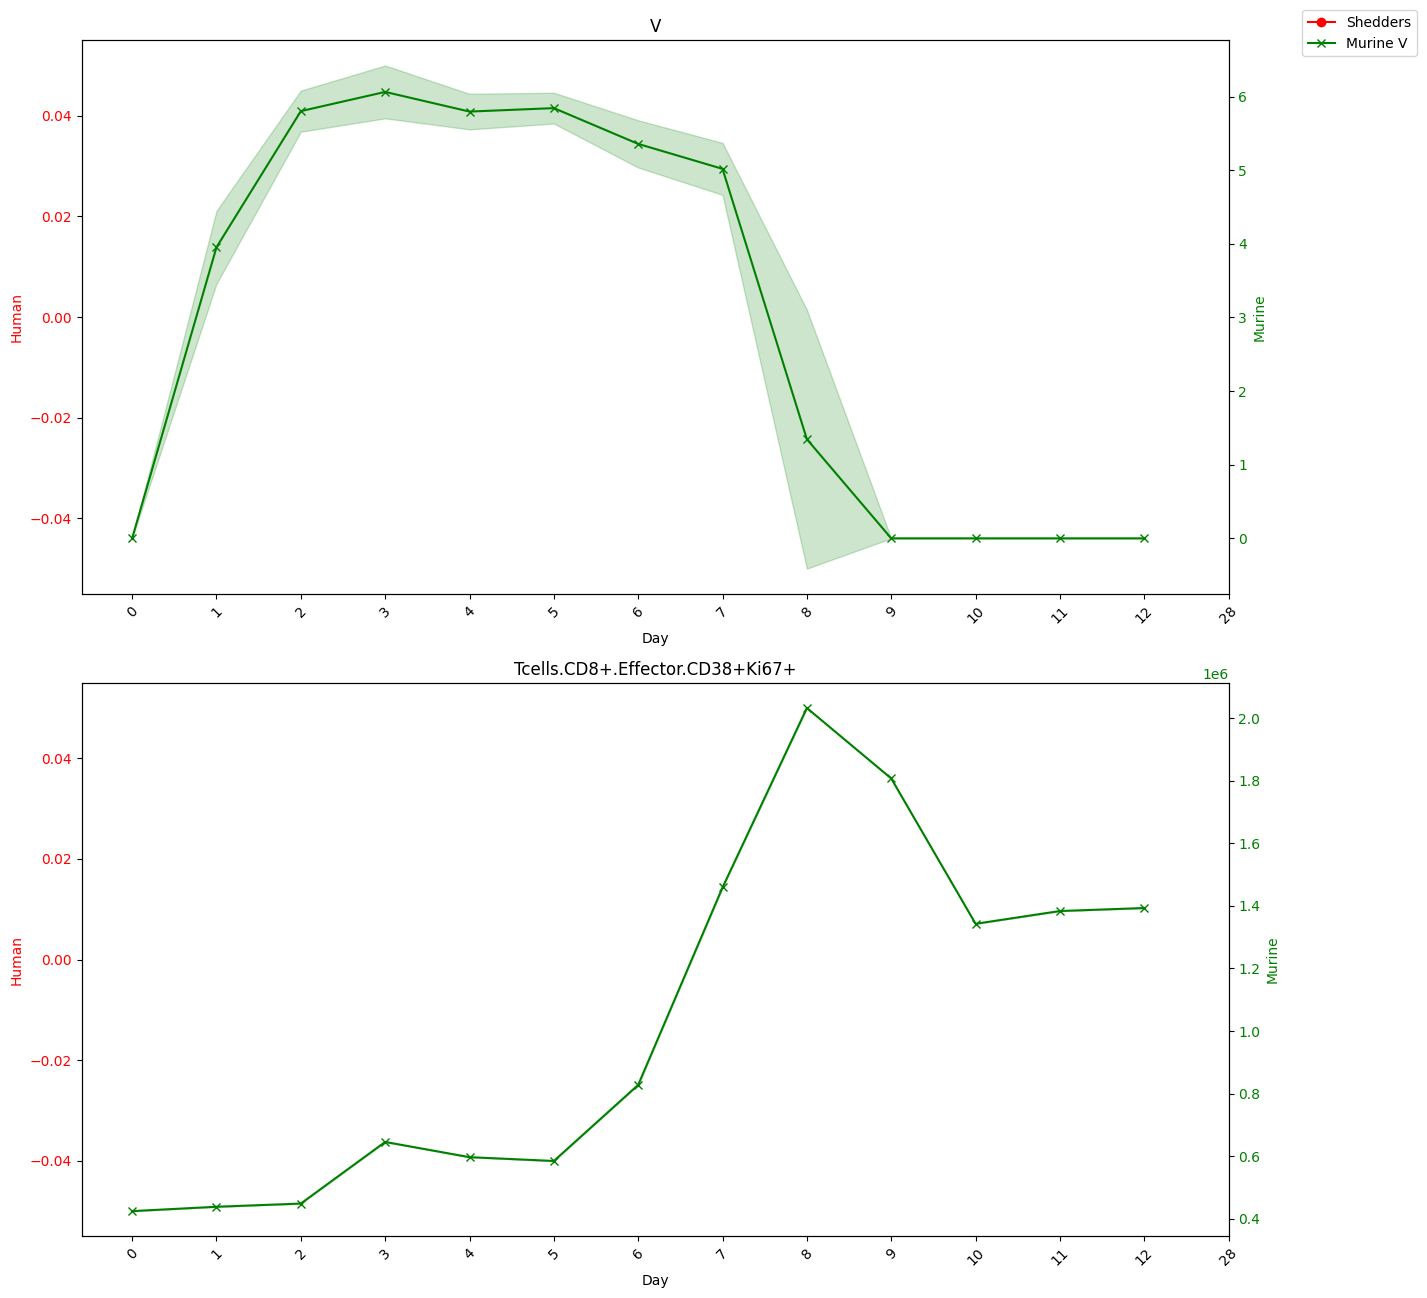

In [13]:
groups = [['V', "Tcells.CD8+.Effector.CD38+Ki67+"]]
pair_keys = [['V', 'E']]
murine_file = '../../Murine Data.xlsx'
murine_data = pd.read_excel(murine_file, sheet_name='Dynamics')
Rahil_data = pd.read_excel('')
def plot_grouped_data(data, groups, comp_data, pair_keys):
    murine_days = comp_data['TIME'].unique()
    human_days = data['DAY'].unique()
    days = np.union1d(human_days, murine_days)
    day_to_position = {day: pos for pos, day in enumerate(days)}
    positions = list(range(len(days)))
    shedders = data.groupby('VOLUNTEER')['V'].any()
    
    legend_handles = []
    for group_num, group in enumerate(groups, start=1):
        plt.figure(figsize=(13, 13))
        num_subplots = len(group)
        rows_per_figure = int(np.ceil(np.sqrt(num_subplots)))
        cols_per_figure = int(np.ceil(num_subplots / rows_per_figure))

        for i, measurement in enumerate(group):
            ax = plt.subplot(rows_per_figure, cols_per_figure, i + 1)
            ax2 = ax.twinx()  # Secondary Y-axis for murine data

            shedder_data = data[data['VOLUNTEER'].isin(shedders[shedders].index)]
            shedder_mean = shedder_data.groupby('DAY')[measurement].mean()
            shedder_std = shedder_data.groupby('DAY')[measurement].std()

            murine_measurement = pair_keys[group_num-1][i]
            murine_mean = 10**comp_data.groupby('TIME')[murine_measurement].mean()
            murine_std = 10**comp_data.groupby('TIME')[murine_measurement].std()

            if measurement == 'V':
                shedder_mean = np.log10(np.maximum(shedder_mean, 1.0))
                shedder_std = np.log10(np.maximum(shedder_std, 1.0))
                murine_mean = np.log10(np.maximum(murine_mean, 1.0))
                murine_std = np.log10(np.maximum(murine_std, 1.0))
                
            shedder_line = ax.plot([day_to_position[day] for day in shedder_mean.index], shedder_mean, 'o-', label='Shedders', color='red')
            shedder_area = ax.fill_between([day_to_position[day] for day in shedder_mean.index], shedder_mean - shedder_std, shedder_mean + shedder_std, alpha=0.2, color='red')
            
            murine_line = ax2.plot([day_to_position[day] for day in murine_days], murine_mean, 'x-', label='Murine ' + murine_measurement, color='green')
            murine_area = ax2.fill_between([day_to_position[day] for day in murine_days], murine_mean - murine_std, murine_mean + murine_std, alpha=0.2, color='green')

            ax.set_title(measurement)
            ax.set_xlabel('Day')
            ax.set_xticks(positions)
            ax.set_xticklabels([str(day) for day in days], rotation=45)
            ax.set_ylabel('Human', color='red')
            ax.tick_params(axis='y', labelcolor='red')
            ax2.set_ylabel('Murine', color='green')
            ax2.tick_params(axis='y', labelcolor='green')
            #ax.set_yscale('log')
            #ax2.set_yscale('log')
            if i == 0:  # Collect legend handles
                legend_handles.extend([shedder_line[0], murine_line[0]])
            plt.tight_layout()
        plt.figlegend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
        plt.show()

plot_grouped_data(Rahil_data, groups, murine_data, pair_keys)

In [ ]:
def plot_seroconversion(dat, col):
    fig, ax = plt.subplots(figsize=(8, 6))

    volunteers = dat['VOLUNTEER'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(volunteers)))
    color_dict = dict(zip(volunteers, colors))
    markers = {True: 'o', False: 's'}
    means = dat.groupby('ShedderStatus')[col].mean()
    stds = dat.groupby('ShedderStatus')[col].std()

    for status, marker in markers.items():
        group_data = dat[dat['ShedderStatus'] == status]
        # Apply jitter to the x-axis position
        jittered_x = np.random.normal(1 if status else 2, 0.05, size=len(group_data))
        
        # Plot each volunteer with a unique color
        for x, row in zip(jittered_x, group_data.itertuples()):
            ax.scatter(x, row._2, color=color_dict[row.VOLUNTEER],
                       marker=marker)
            
        # Plot mean and std as black points and error bars
        ax.errorbar(1 if status else 2, means[status], yerr=stds[status], fmt=marker,
                    color='black', capsize=5, markersize=10)

    # Set plot labels and title
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Shedders', 'Nonshedders'])
    ax.set_title(f'Seroconversion Levels for {col}')
    
    plt.tight_layout()
    plt.show()

    return color_dict, volunteers

def create_legends(color_dict, dat, status, col):
    # Create a legend for each Shedder status
    group_data = dat[dat['ShedderStatus'] == status]
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.axis('off')
    
    legend_elements = [plt.Line2D([0], [0], marker='o', color=color_dict[vol], label=f'Volunteer {vol}: {value:.2f}',
                                  markersize=5, linestyle='') for vol, value in zip(group_data['VOLUNTEER'], group_data[col])]
    ax.legend(handles=legend_elements, title=f"{'Shedders' if status else 'Nonshedders'} Full-length Seroconversion", bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

dat = pd.read_excel('Full-Length.xlsx') 
color_dict, volunteers = plot_seroconversion(dat, 'Full-Titer')
create_legends(color_dict, dat, True, 'Full-Titer')
create_legends(color_dict, dat, False, 'Full-Titer')

dat = pd.read_excel('Stalk.xlsx') 
color_dict, volunteers = plot_seroconversion(dat, 'Stalk')
create_legends(color_dict, dat, True, 'Stalk')
create_legends(color_dict, dat, False, 'Stalk')

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\3727603930.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dat['ShedderStatus'] = dat.groupby('VOLUNTEER')['V'].transform(lambda x: any(x > 0)) # Shedder based on 'V'


KeyError: 'Column not found: Tcells.CD8+.Effector.CD38+Ki67+'

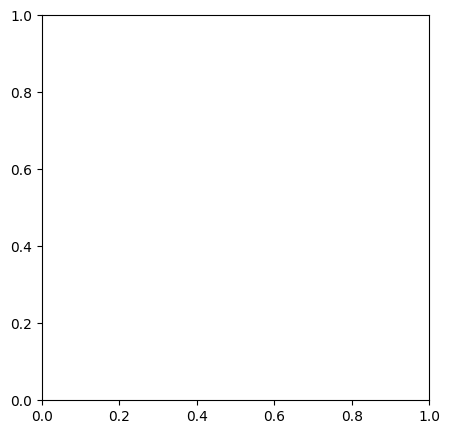

In [19]:
def plot_grouped_data_with_individuals(data, groups, comp_data, pair_keys):
    murine_days = comp_data['TIME'].unique()
    human_days = data['DAY'].unique()
    days = np.union1d(human_days, murine_days)
    day_to_position = {day: pos for pos, day in enumerate(days)}
    positions = list(range(len(days)))
    shedders = data.groupby('VOLUNTEER')['V'].any()
    
    legend_handles = []
    for group_num, group in enumerate(groups, start=1):
        plt.figure(figsize=(5, 5))
        num_subplots = len(group)
        rows_per_figure = int(np.ceil(np.sqrt(num_subplots)))
        cols_per_figure = int(np.ceil(num_subplots / rows_per_figure))

        for i, measurement in enumerate(group):
            ax = plt.subplot(rows_per_figure, cols_per_figure, i + 1)
            #ax2 = ax.twinx()  # Secondary Y-axis for murine data

            shedder_data = data[data['VOLUNTEER'].isin(shedders[shedders].index)]
            shedder_mean = shedder_data.groupby('DAY')[measurement].mean()
            shedder_std = shedder_data.groupby('DAY')[measurement].std()

            if measurement == 'V':
                shedder_mean = np.log10(shedder_mean+1.0)
                shedder_std = np.log10(np.maximum(shedder_std,1.0))
                print('Virus',shedder_mean)
            else:
                shedder_mean = np.log10(shedder_mean * 5.6E7)
                print('E', shedder_mean)
                shedder_std = np.log10(shedder_std * 5.6E7)
            murine_measurement = pair_keys[group_num-1][i]
            murine_mean = comp_data.groupby('TIME')[murine_measurement].mean()

            # Plot the averages and get the y-axis limits
            shedder_line = ax.plot([day_to_position[day] for day in shedder_mean.index], shedder_mean, 'o-', label='Shedders', color='red')
            murine_line = ax.plot([day_to_position[day] for day in murine_days], murine_mean, 'x-', label='Murine ' + murine_measurement, color='green')
            human_y_limits = ax.get_ylim()
            #murine_y_limits = ax2.get_ylim()

            # Now plot individual traces
            #for volunteer in shedder_data['VOLUNTEER'].unique():
                #individual_data = shedder_data[shedder_data['VOLUNTEER'] == volunteer]
                #individual_mean = individual_data.groupby('DAY')[measurement].mean()
                #if measurement == 'V':
                    #individual_mean = np.log10(np.maximum(individual_mean, 1.0))
                    #individual_base = individual_data.groupby('DAY')[measurement].mean().iloc[0]
                    #individual_mean = individual_mean / individual_base
                #ax.plot([day_to_position[day] for day in individual_mean.index], individual_mean, '-o', alpha=0.3, markersize=4)

            # Re-apply the original y-axis limits
            #ax.set_ylim(human_y_limits)
            #ax2.set_ylim(murine_y_limits)

            ax.set_title(measurement)
            ax.set_xlabel('Day')
            ax.set_xticks(positions)
            ax.set_xticklabels([str(day) for day in days], rotation=45)
            ax.set_ylabel('Human Data')
            #ax2.set_ylabel('Murine Data', color='green')
            #ax2.tick_params(axis='y', labelcolor='green')

            if i == 0:  # Collect legend handles
                legend_handles.extend([shedder_line[0], murine_line[0]])

            plt.tight_layout()

        plt.figlegend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
        plt.show()

file_path = 'Table8.xlsx'
cols = list(range(0, 143))  # drop the last 72 columns (cell medians)
dat = pd.read_excel(file_path, usecols=cols)
baseline_days = [0]
measurement_columns = dat.columns[15:]
numeric_columns = dat.columns[3:]
dat[numeric_columns] = dat[numeric_columns].apply(pd.to_numeric, errors='coerce')
dat['ShedderStatus'] = dat.groupby('VOLUNTEER')['V'].transform(lambda x: any(x > 0)) # Shedder based on 'V' 
baseline_data = dat[dat['DAY'].isin(baseline_days)]
baseline_means = baseline_data.groupby('ShedderStatus')[measurement_columns].mean() + 1e-8
for col in measurement_columns:
    shedder_baseline = baseline_means[col].loc[True]
    nonshedder_baseline = baseline_means[col].loc[False]
         
groups = [["Tcells.CD8+.Effector.CD38+Ki67+"]]
pair_keys = [['E']] 
# Select only SIDs = 3 7 10 18 from dataframe
#Rahil_data = Rahil_data[Rahil_data['VOLUNTEER'].isin([107, 111, 204, 312])]
plot_grouped_data_with_individuals(dat, groups, murine_data, pair_keys)      

In [ ]:
file_path = 'Table_Select_Shedders.xlsx'
dat = pd.read_excel(file_path)
baseline_days = [0]
baseline_data = dat[dat['DAY'].isin(baseline_days)]
baseline_means = baseline_data.groupby('SID').mean()
groups = [['E']]
pair_keys = [['E']]
murine_file = '../../Murine Data.xlsx'
murine_data = pd.read_excel(murine_file, sheet_name='Dynamics')

def plot_shedder(data, groups, comp_data, pair_keys):
    murine_days = comp_data['TIME'].unique()
    human_days = data['DAY'].unique()
    days = np.union1d(human_days, murine_days)
    day_to_position = {day: pos for pos, day in enumerate(days)}
    positions = list(range(len(days)))
    shedders = data.groupby('VOLUNTEER')['V'].any()
    
    legend_handles = []
    for group_num, group in enumerate(groups, start=1):
        plt.figure(figsize=(5, 5))
        num_subplots = len(group)
        rows_per_figure = int(np.ceil(np.sqrt(num_subplots)))
        cols_per_figure = int(np.ceil(num_subplots / rows_per_figure))

        for i, measurement in enumerate(group):
            ax = plt.subplot(rows_per_figure, cols_per_figure, i + 1)
            ax2 = ax.twinx()  # Secondary Y-axis for murine data
            data_mean = np.log10(data.groupby('DAY')[measurement].mean())
            murine_measurement = pair_keys[group_num-1][i]
            murine_mean = comp_data.groupby('TIME')[murine_measurement].mean()

            # Plot the averages and get the y-axis limits
            #shedder_line = ax.plot([day_to_position[day] for day in data_mean.index], data_mean, 'o-', label='Shedders', color='red')
            murine_line = ax2.plot([day_to_position[day] for day in murine_days], murine_mean, 'x-', label='Murine ' + murine_measurement, color='green')

            # Now plot individual traces
            for volunteer in data['SID'].unique():
                individual_data = data[data['SID'] == volunteer]
                individual_mean = individual_data.groupby('DAY')[measurement].mean()
                if measurement == 'V':
                    individual_mean = np.log10(np.maximum(individual_mean, 1.0))
                ax.plot([day_to_position[day] for day in individual_mean.index], individual_mean, '-o', alpha=0.3, markersize=4)

            ax.set_title(measurement)
            ax.set_xlabel('Day')
            ax.set_xticks(positions)
            ax.set_xticklabels([str(day) for day in days], rotation=45)
            ax.set_ylabel('Human Data')
            ax2.set_ylabel('Murine Data', color='green')
            ax2.tick_params(axis='y', labelcolor='green')
            plt.tight_layout()
        plt.show()
        
plot_shedder(dat, groups, murine_data, pair_keys)      

NameError: name 'pd' is not defined

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         0.         3.30492116 0.
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


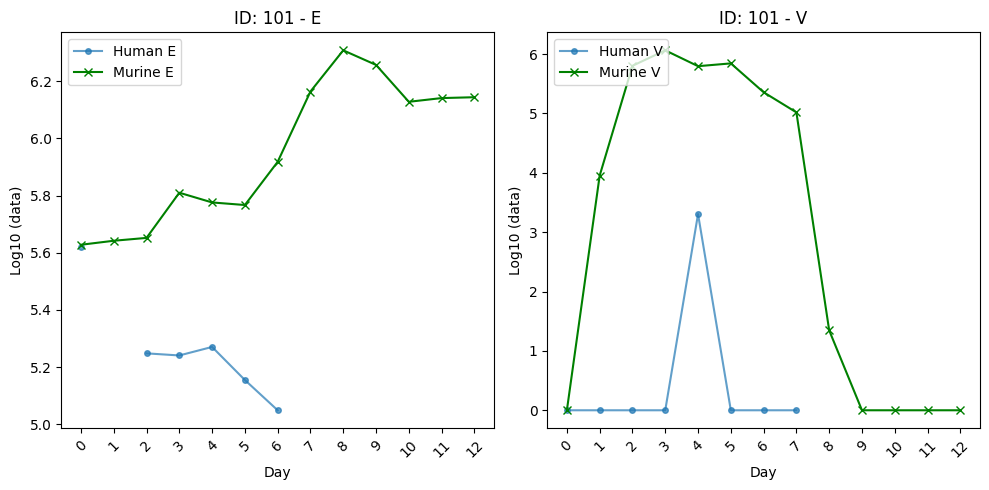

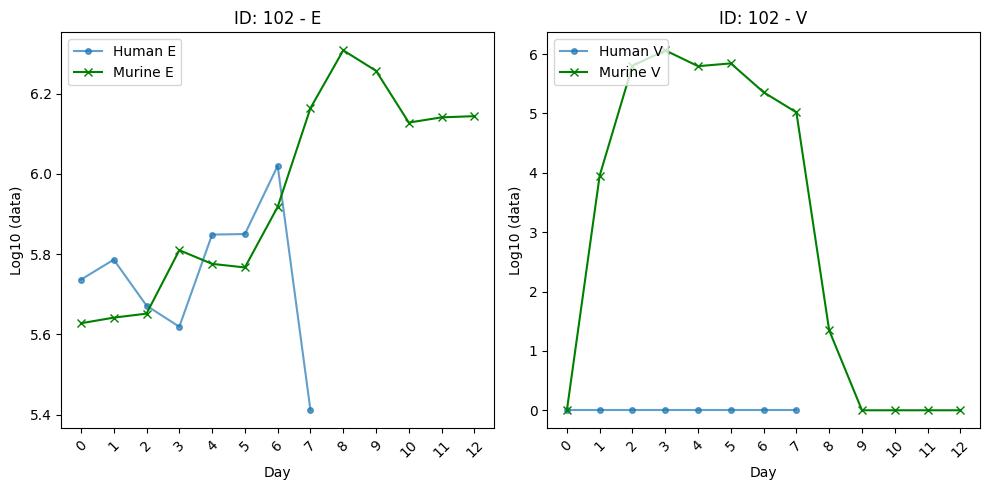

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         5.39482627 5.87137909 5.12229454 4.16058857
 5.19679774 2.45484486]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


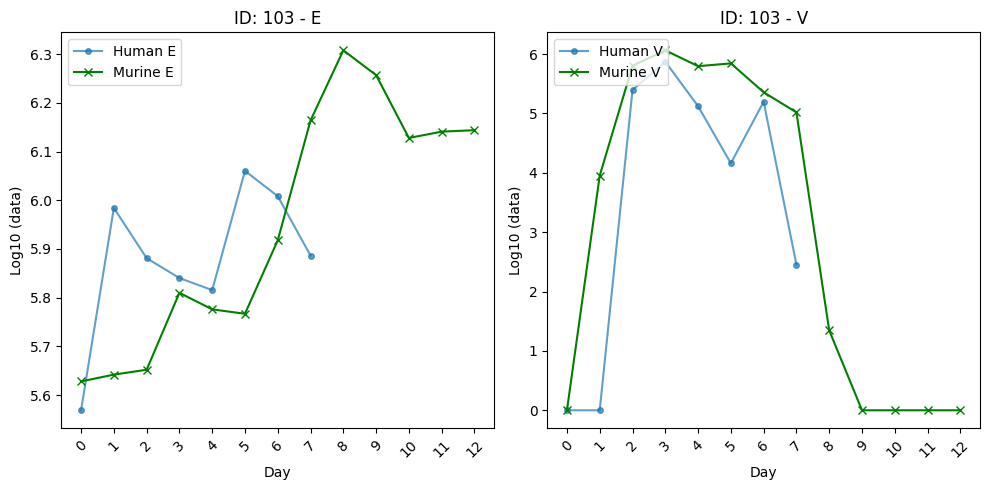

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


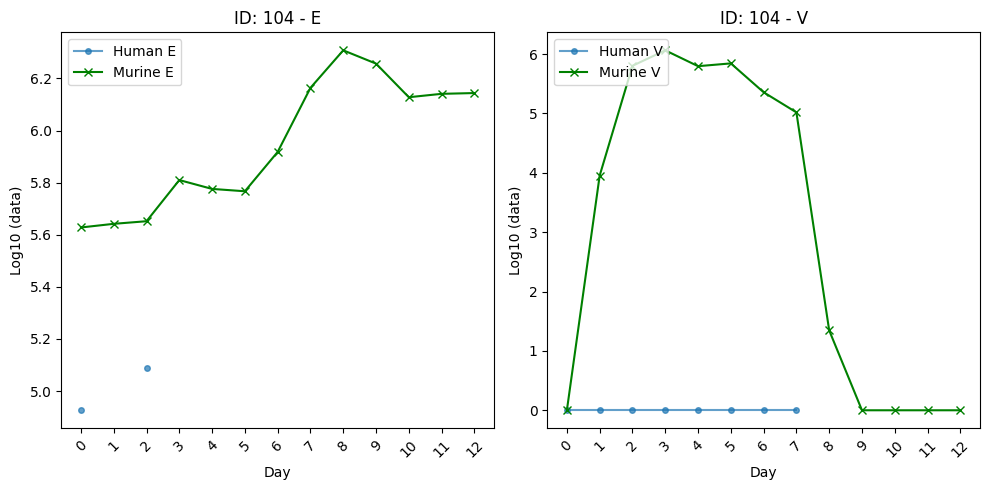

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


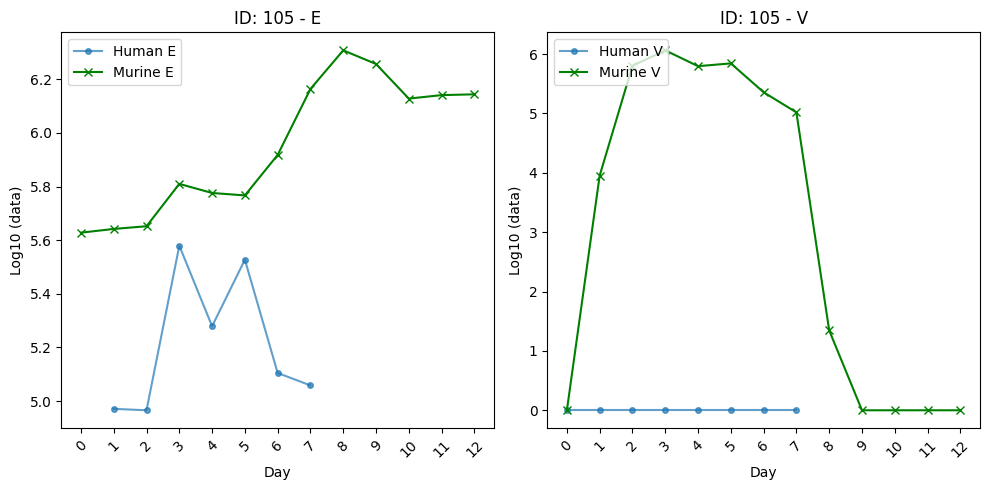

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


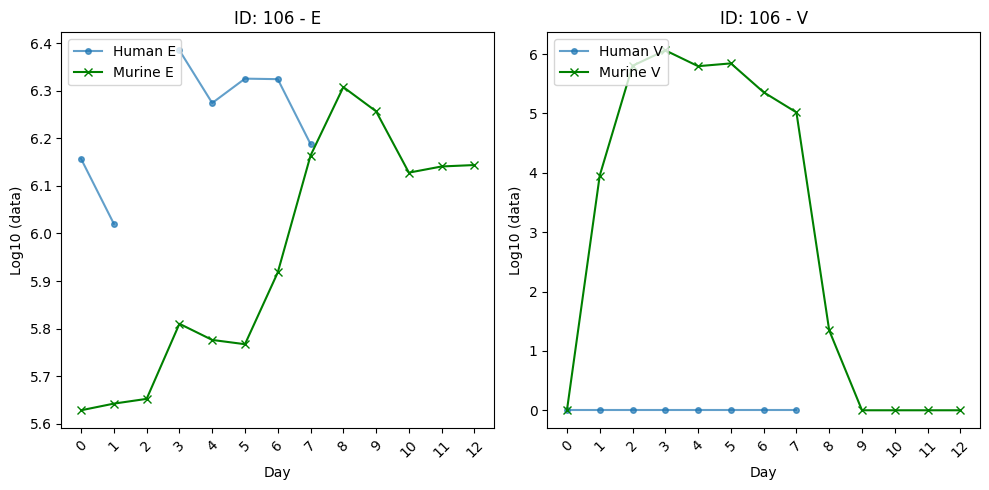

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         3.1670218  4.70286978 5.44462711 6.52170269 5.71173639
 4.3848908  0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


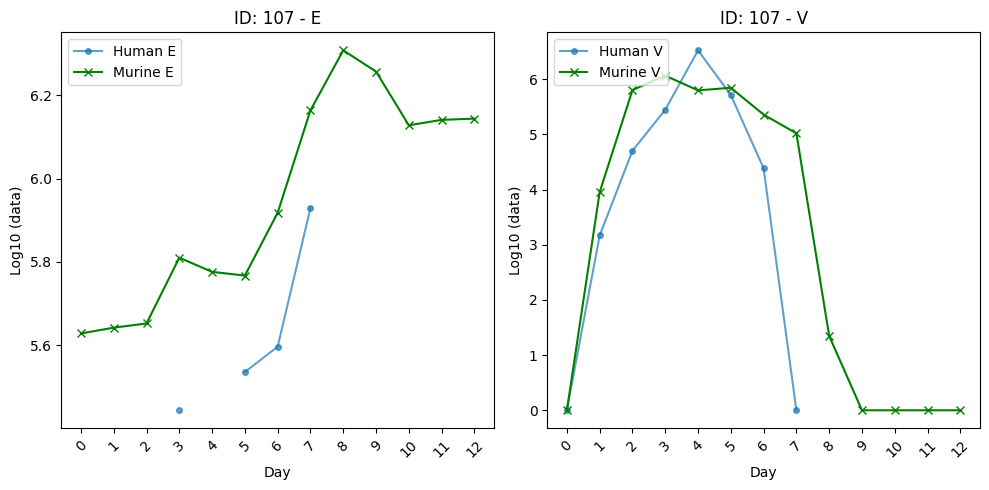

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         3.40636984 0.         4.51690539 0.
 6.09695518 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


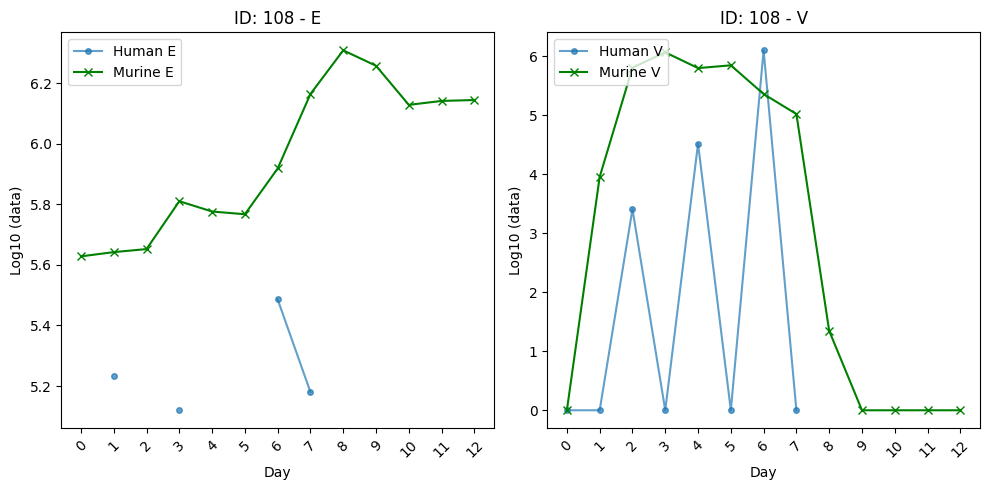

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         2.92220628 0.         0.         0.
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


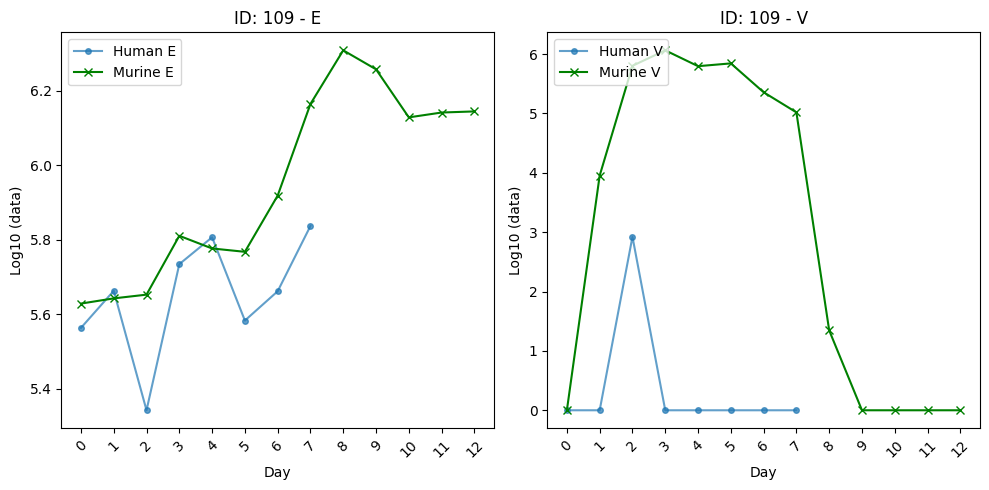

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         5.25184011 0.         3.96750117
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


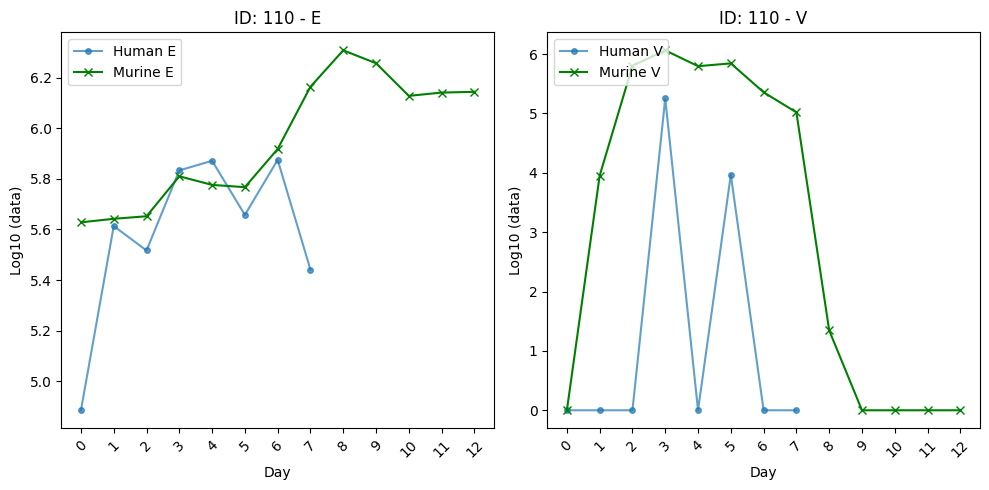

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         5.44236687 4.7160952  5.77632337
 5.22345181 3.90503993]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


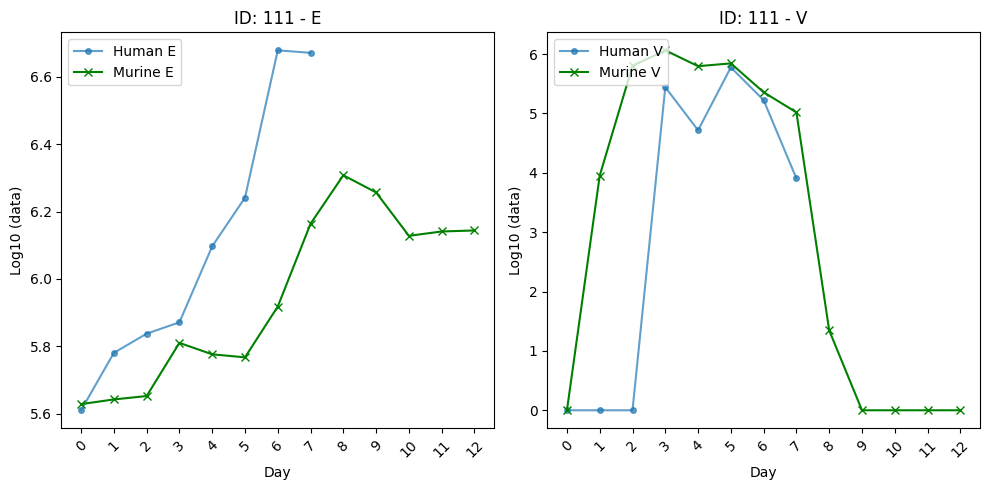

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         5.89560982 6.14544441 2.45484486
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


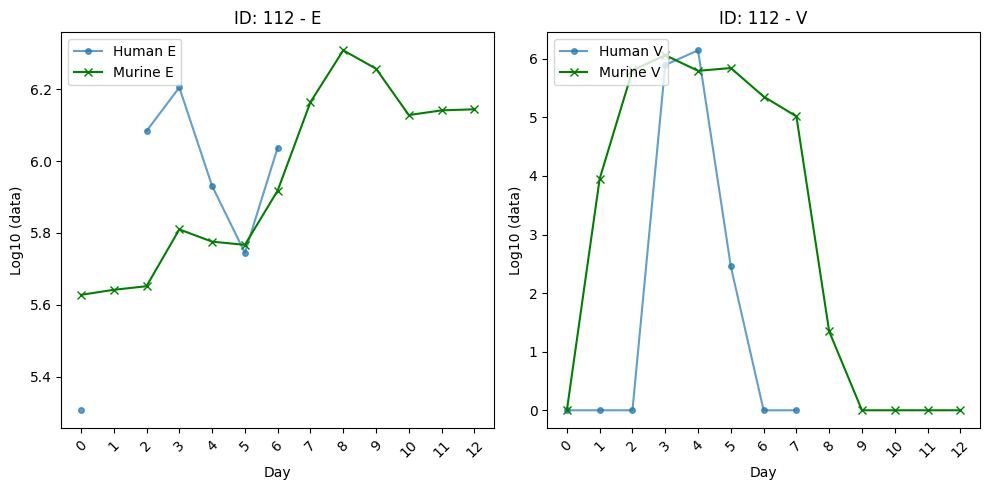

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         3.40840958 2.92634245 0.         0.         0.
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


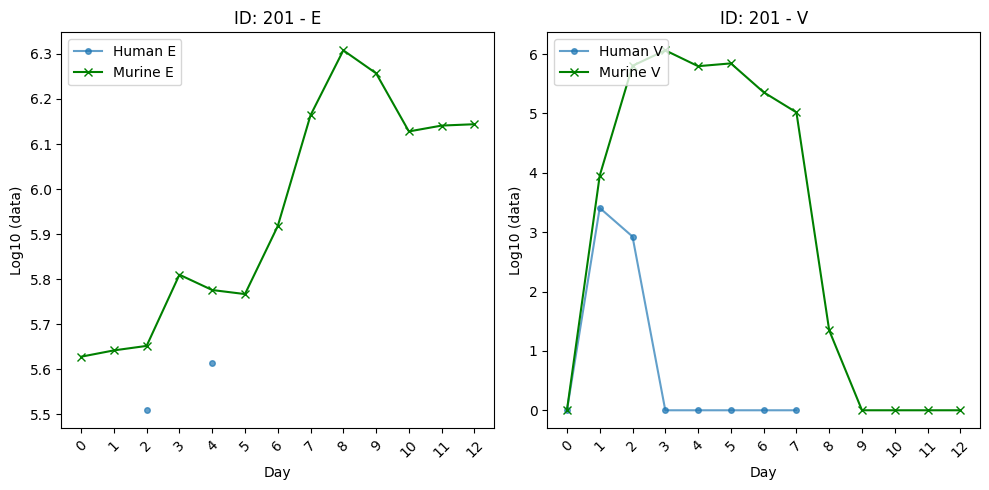

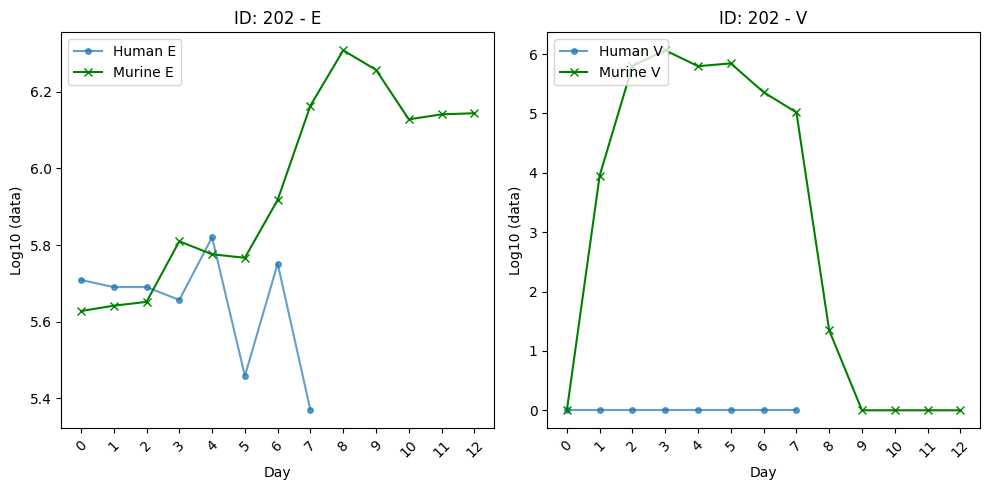

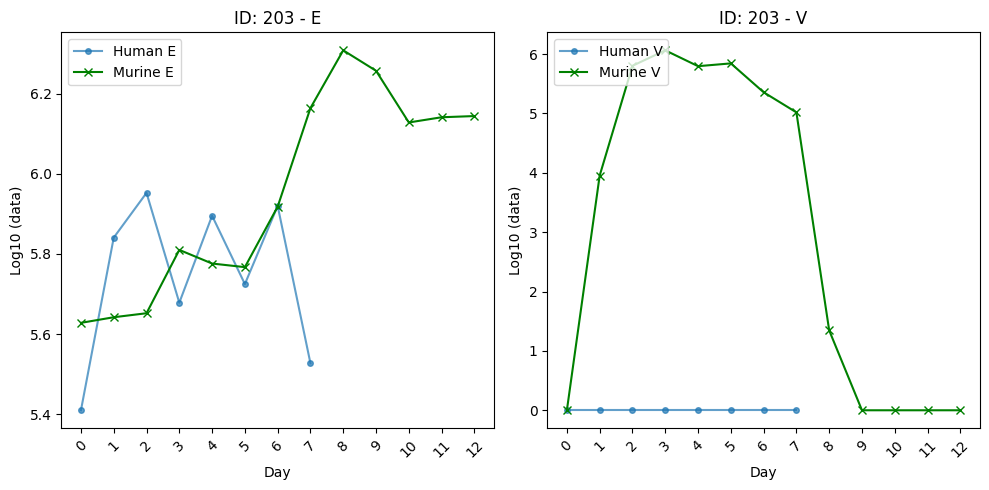

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         4.74549638 3.198107   2.93500315 0.
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


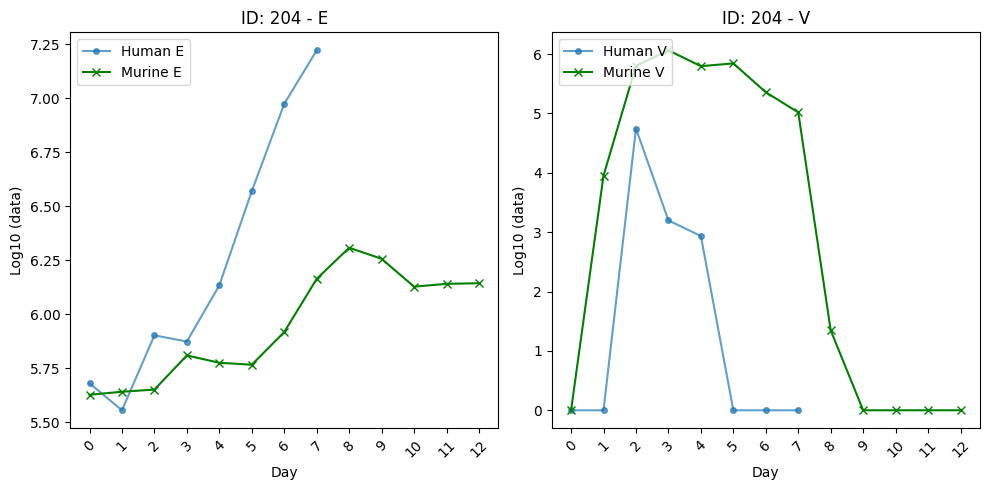

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


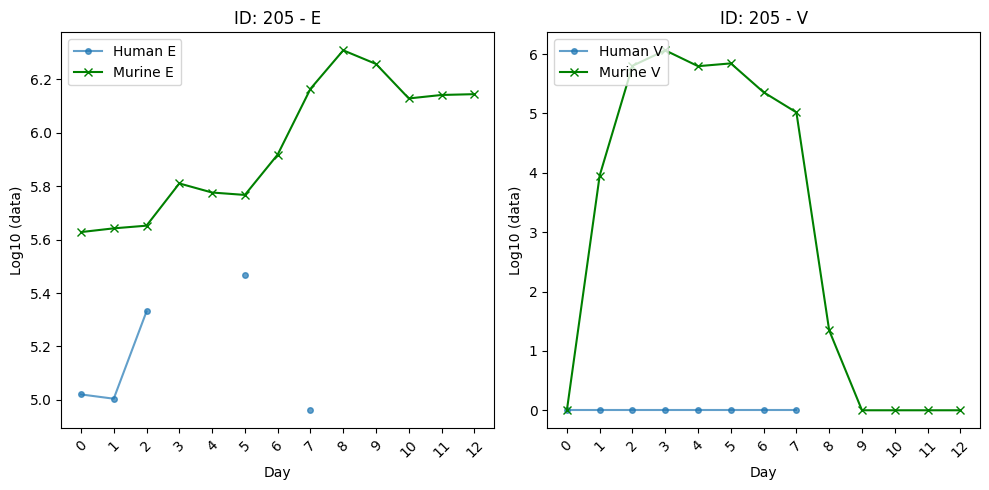

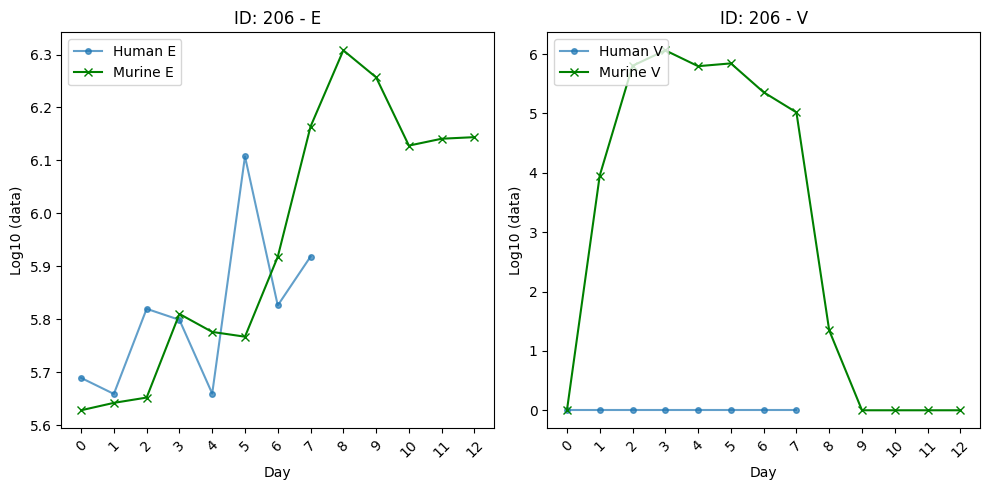

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         5.75767686 6.26403633 4.77366945 2.67302091
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


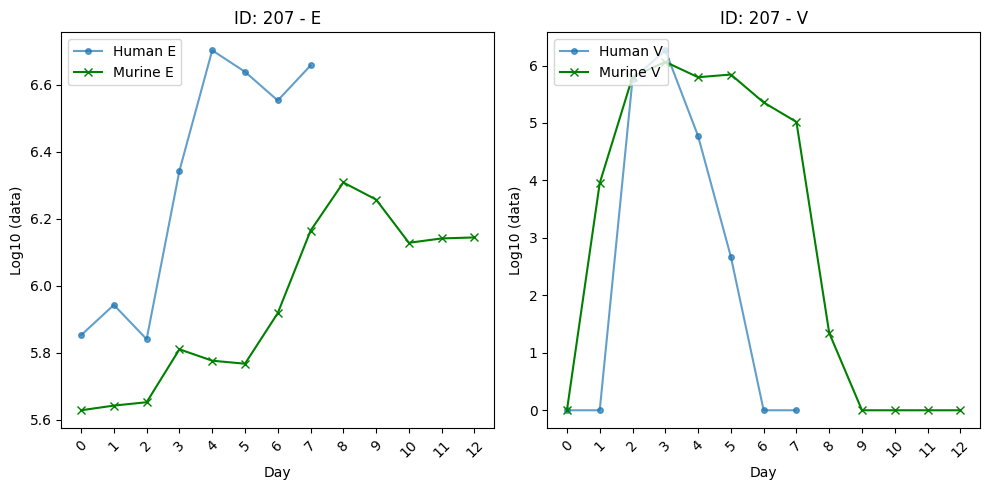

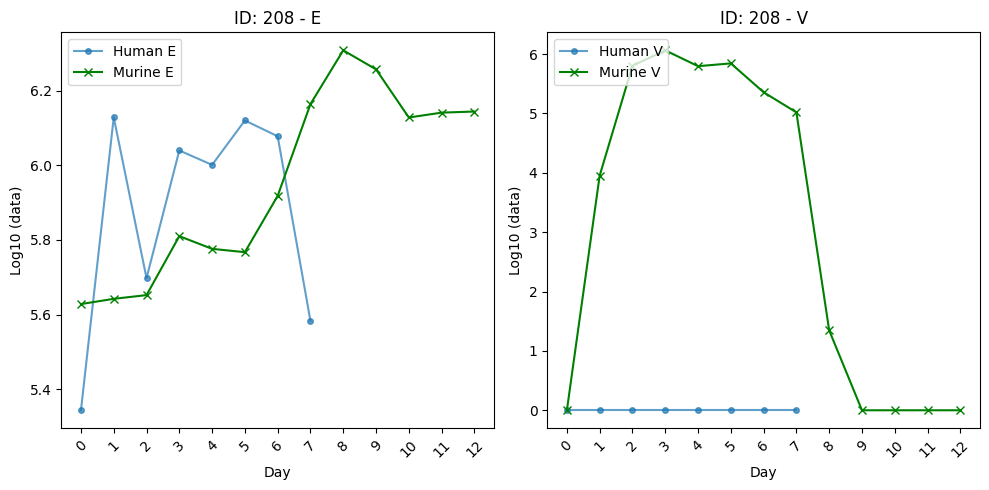

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         3.36977229 5.22732613 5.80664456 5.89275112 6.0556577
 6.13818487 6.41316291]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


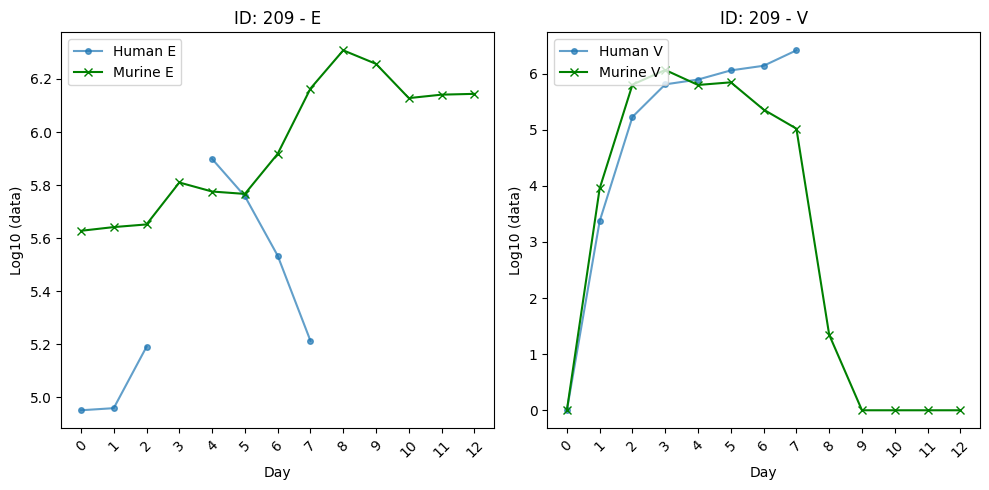

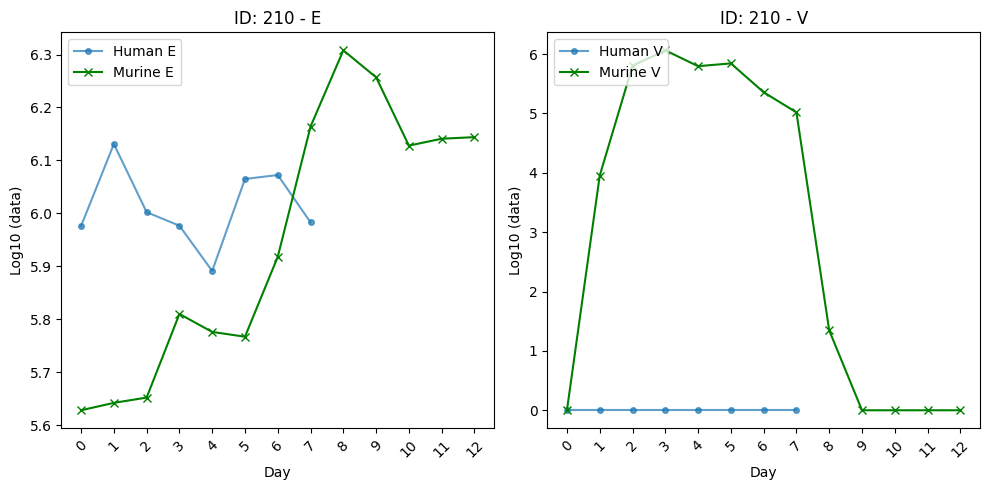

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


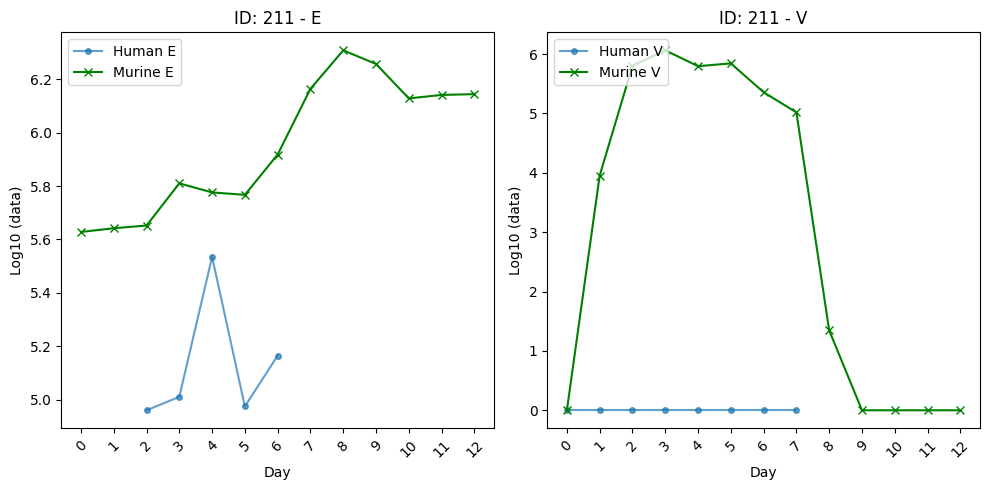

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         3.96796896 7.00536745 8.1666501  5.98783021 6.33283904
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


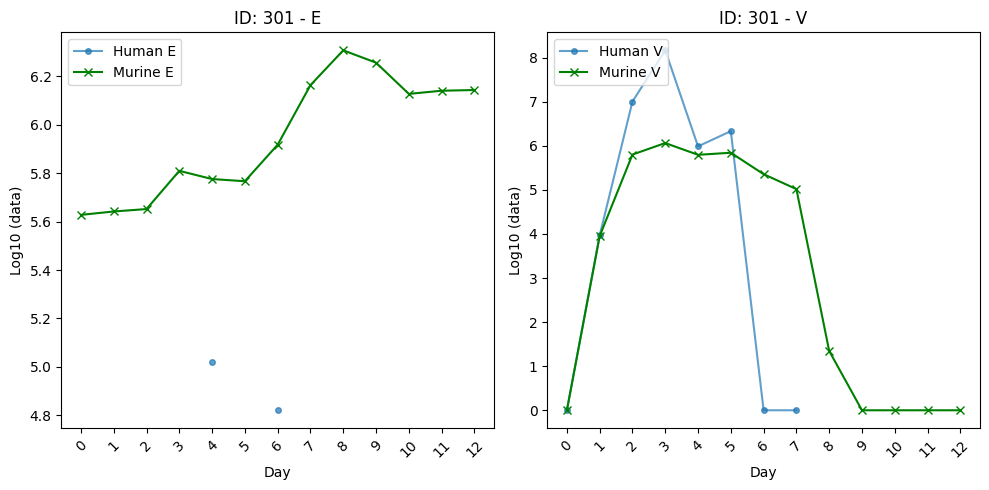

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         4.25659749 7.33331715 6.34899937 5.72622989 5.23975731
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


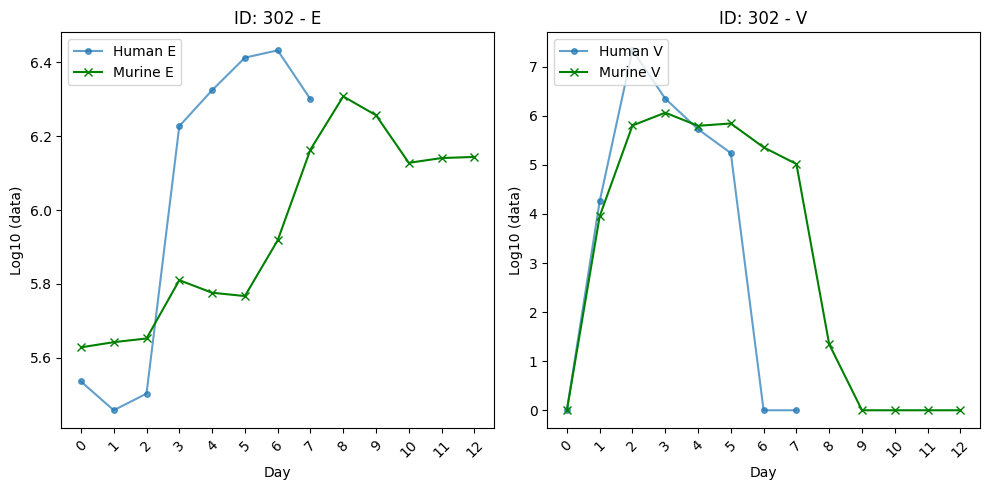

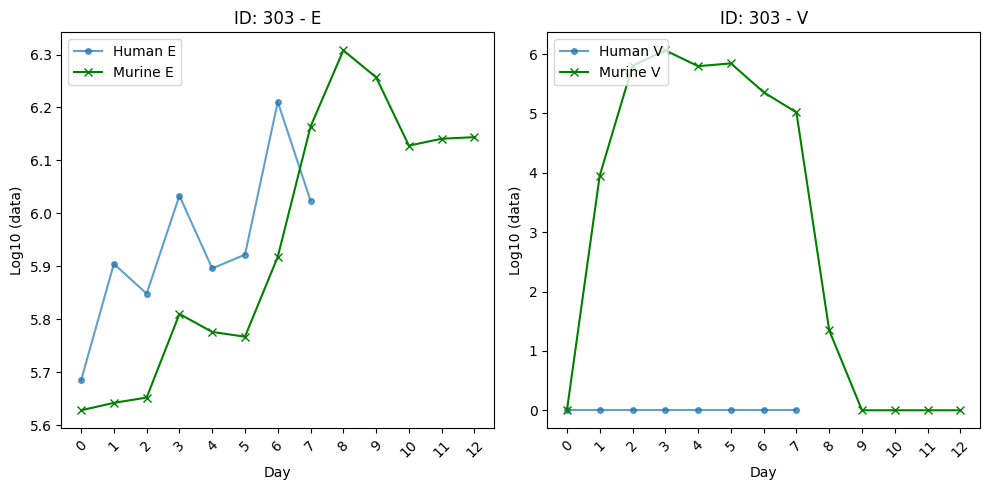

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.         0.         0.         3.99356848
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


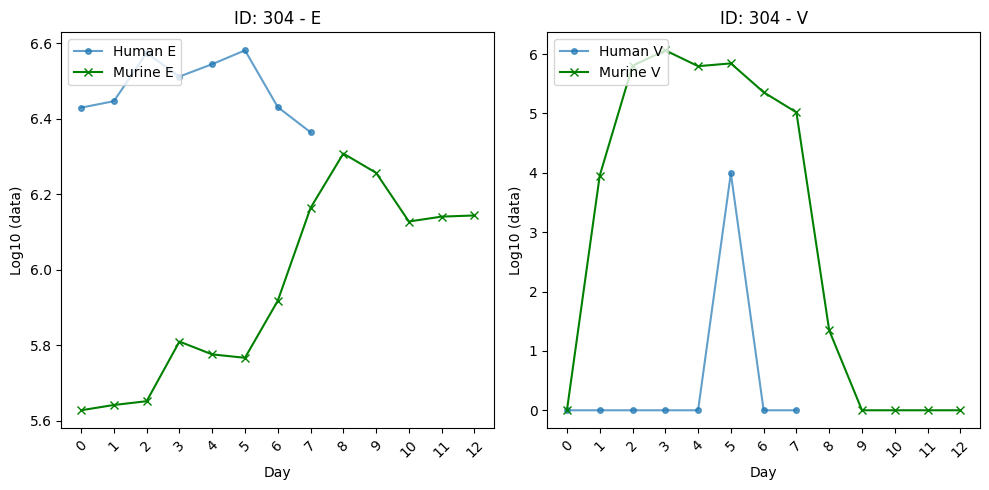

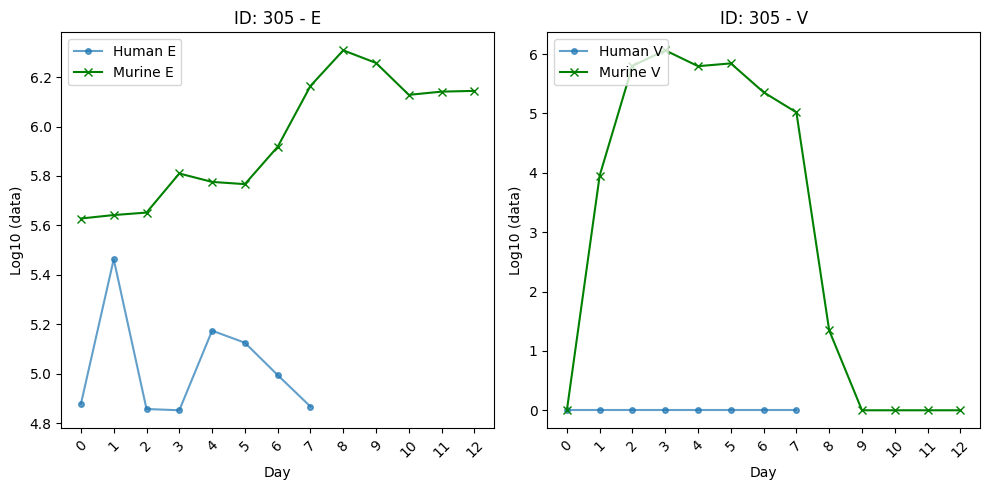

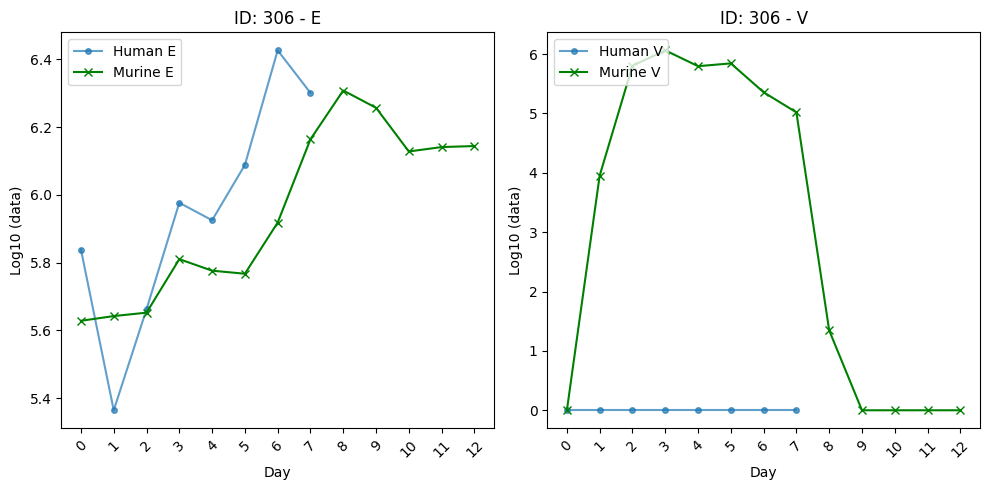

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         4.97434126 6.4900147  3.50528567 7.27977646 4.47379342
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


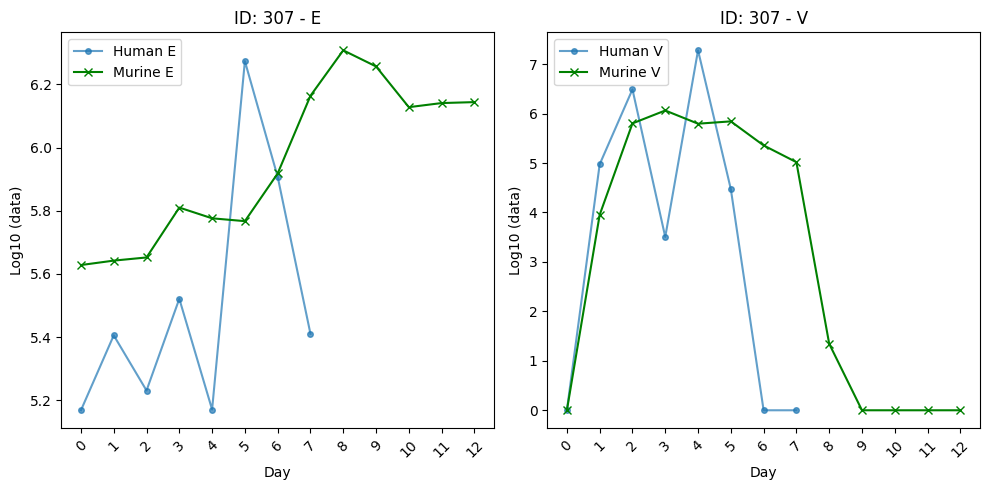

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         3.41647408 6.46365085 4.53582558 5.39021598 5.20009502
 5.10905857 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


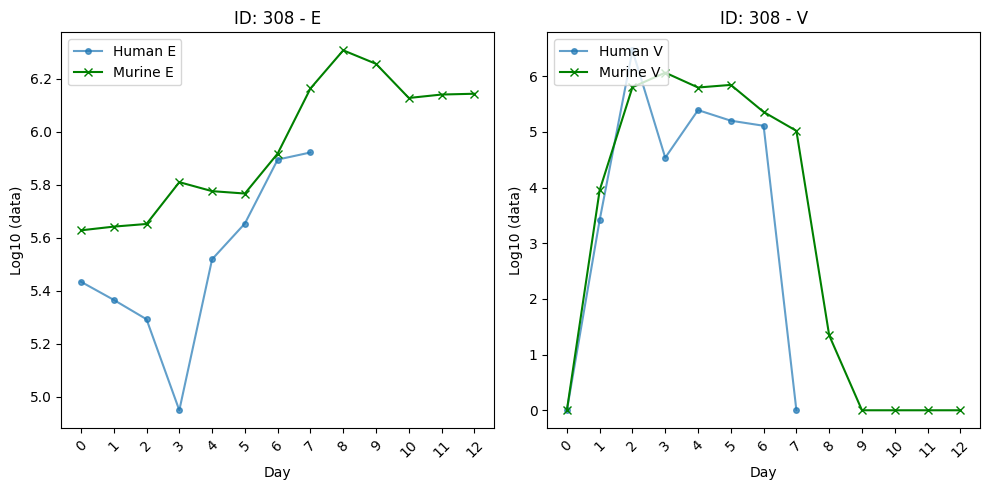

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


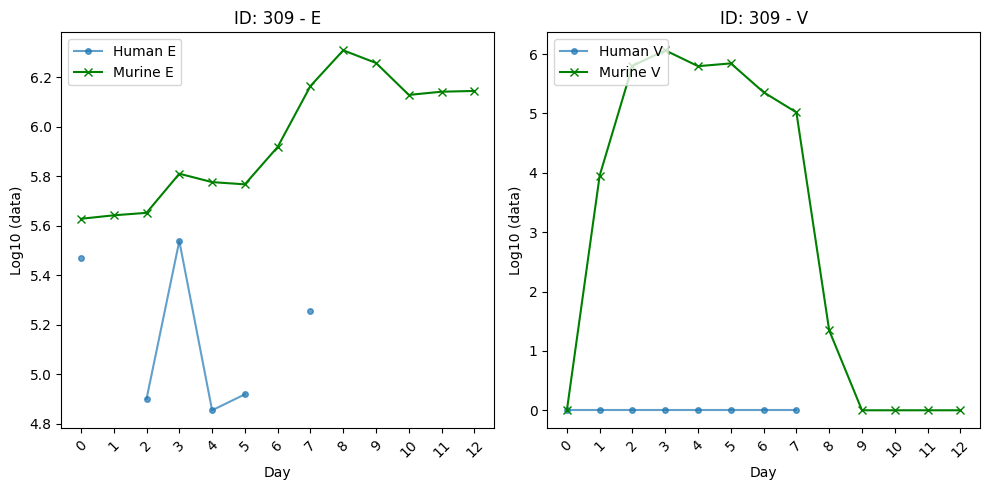

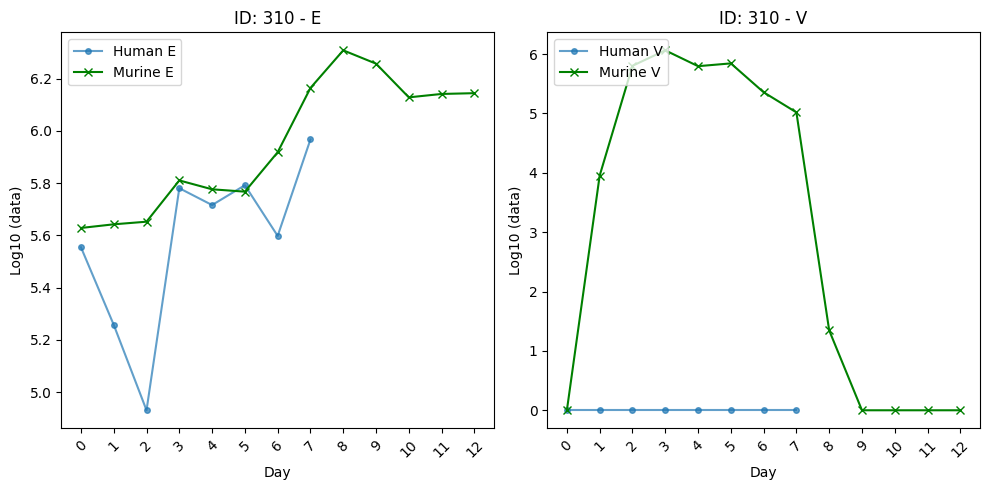

C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         3.57760668 5.35084089 2.897077   0.         0.
 0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


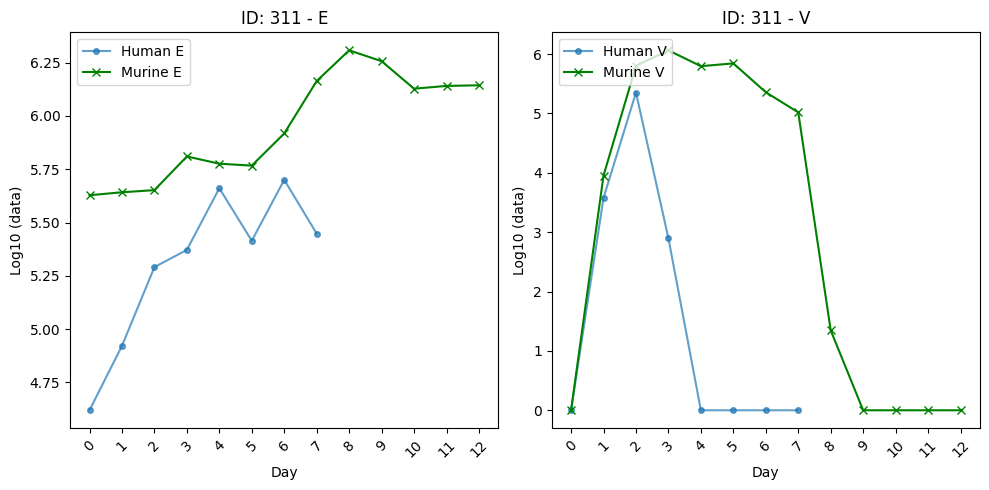

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jorda\AppData\Local\Temp\ipykernel_37904\772173944.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         3.22634209 3.84429074 6.45702957 6.13516892
 4.83732955 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)


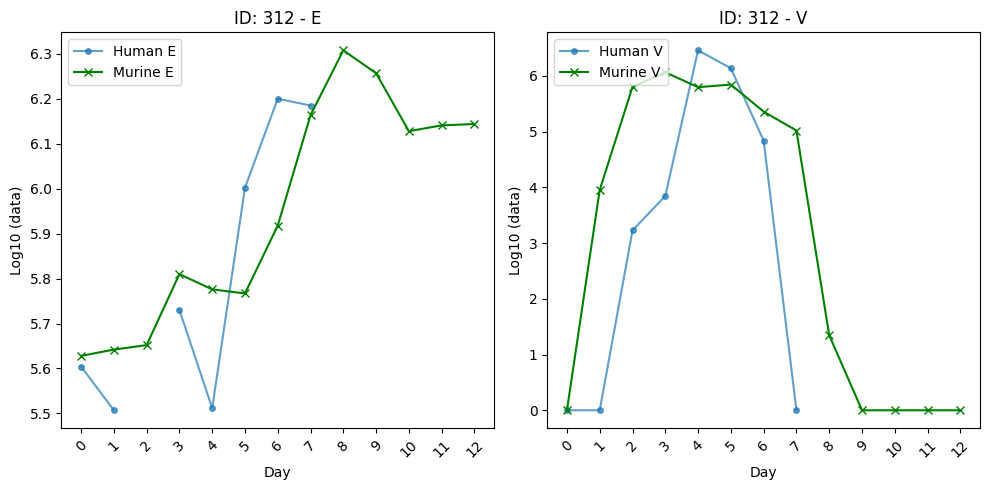

In [21]:
def plot_shedder_individual(data, comp_data):
    # Unified days from both datasets for X-axis ticks
    murine_days = comp_data['TIME'].unique()
    human_days = data['DAY'].unique()
    unified_days = np.union1d(human_days, murine_days)

    sids = data['VOLUNTEER'].unique()

    for sid in sids:
        plt.figure(figsize=(10, 5))  # Adjust for two subplots side by side

        for i, measurement in enumerate(['E', 'V'], start=1):
            ax = plt.subplot(1, 2, i)
            human_data = data[(data['VOLUNTEER'] == sid) & (~data[measurement].isna())].copy()
            
            if measurement == 'V':
                human_data.loc[:, measurement] = np.log10(human_data[measurement] + 1.0)
                ylims = []
            elif measurement == 'E':
                human_data.loc[:, measurement] = np.log10(human_data[measurement] * 5.6E7)
            human_mean = human_data.groupby('DAY')[measurement].mean()
            murine_mean = comp_data.groupby('TIME')[measurement].mean()

            ax.plot(human_mean.index, human_mean, '-o', alpha=0.7, markersize=4, label='Human ' + measurement)
            ax.plot(murine_mean.index, murine_mean, 'x-', label='Murine ' + measurement, color='green')

            # Configure axes
            ax.set_title(f'ID: {sid} - {measurement}')
            ax.set_xlabel('Day')
            ax.set_xticks(unified_days)  # Ensure ticks cover all unified days
            ax.set_xticklabels([str(int(day)) for day in unified_days], rotation=45)
            ax.set_ylabel('Log10 (data)')
            ax.legend(loc='upper left')

        plt.tight_layout()
        plt.show()

dat = dat[dat['DAY'] < 12]
plot_shedder_individual(dat, murine_data)